#  EDA Methodologies For Table1 (application_data.csv)

## 1. Reading & Analysing Dataframes

In [1]:
#importing the useful libraries.
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data set of application_data.csv
df1 = pd.read_csv('C:/Users/A/Downloads/upgrad/credit EDA assignment/application_data.csv')
df1.shape

(307511, 122)

In [3]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## 2. Data cleaning

### Dropping columns having missing values > 30%

In [4]:
# checking the null values in percentages rounding to 2 decimal points
round(100*df1.isnull().mean().sort_values(ascending=False),2)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

- Since there are lots of columns which have null values greater than 30%, hence we will drop those columns which have missing values > 30%. As those columns won't be helpful for our future analysis.
- But, i see that there is a column "OCCUPATION_TYPE" which might be helpful for our future analysis and it has missing value percentage as 31.35%. So, i will drop columns having missing values greater than 32%

In [5]:
# List of columns have missing values > 32%
cols_to_drop=list(df1.columns[100*df1.isnull().mean()>32])
print(cols_to_drop, len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

- So, there are 49 columns having null values more than 32% in the dataframe which we need to drop.

In [6]:
# dropping 50 columns
df1.drop(cols_to_drop,axis=1,inplace=True)
df1.shape

(307511, 73)

- so, now after removing 49 columns from 122 columns we have left with 73 columns to analyse.
- But, out of those 73 columns there are many unwanted columns which has no use in our analysis. Hence we will drop those columns too.

### Dropping unwanted columns

In [7]:
# We will remove unwanted columns from this dataset
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']
df1.drop(labels=unwanted,axis=1,inplace=True)
df1.shape

(307511, 40)

### Dropping Unwanted Rows

In [8]:
# Count the number of rows having more than 60% missing values
len(df1[df1.isnull().sum(axis=1) > (len(df1.columns)//2)].index)

0

- since, there are 0  rows having missing values > 60% hence we will not drop any rows.

### Checking Remaining columns having missing values < 32% to treat (if required)

In [9]:
# checking the remaining null values in percentages rounding to 2 decimal points
round(100*df1.isnull().mean().sort_values(ascending=False),2)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
ORGANIZATION_TYPE               0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
LIVE_CITY_NOT_WORK_CITY         0.00
SK_ID_CURR                      0.00
TARGET                          0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
F

In [10]:
cols_to_modify=list(df1.columns[(100*df1.isnull().mean()<=32) & (100*df1.isnull().mean()>0)])
print(cols_to_modify, len(cols_to_modify))

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'] 13


- so, there are 13 columns which has null values greater than 0% andd less than equal to 32%. 
- Hence we need to update those missing values using mising value strategies.

#### Missing Value Strategy:
 - (a) For numerical/continuous we can use mean or median. But, median is preferred as it is unaffected by extreme values.
 - (b) For categorical/discrete columns we can use mode for imputing the missing values.

In [11]:
df1.CNT_FAM_MEMBERS.isnull().sum()

2

In [12]:
df1.AMT_GOODS_PRICE.isnull().sum()

278

In [13]:
# creating list of numeric columns to treat missing values
num_cols_for_missing_values=['AMT_GOODS_PRICE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

In [14]:
# using loop to treat all the numeric column's missing values with the median value.
for i in num_cols_for_missing_values:
    med=df1[i].median()
    df1[i]=df1[i].fillna(med)

In [15]:
# checking the total missing values for the categorical column "NAME_TYPE_SUITE"
df1['NAME_TYPE_SUITE'].isnull().sum()

1292

In [16]:
# finding the mode for the column "NAME_TYPE_SUITE"
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
# treating the missing values for the column "NAME_TYPE_SUITE" with the mode value.
df1['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

In [18]:
#  checking if any missing values left in the column "NAME_TYPE_SUITE"
df1['NAME_TYPE_SUITE'].isnull().sum()

0

In [19]:
# checking the total missing values for the categorical column "OCCUPATION_TYPE"
df1['OCCUPATION_TYPE'].isnull().sum()

96391

In [20]:
# finding the mode for the column "OCCUPATION_TYPE"
df1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### Since Missing values count (96,391) is greater than the mode of OCCUPATION_TYPE column count (55,186).
##### So,  it will be biased if we replace those missing values with the Laborers. Hence, we will create a separate category as unknown for these missing values.

In [21]:
# treating the missing values for the column "OCCUPATION_TYPE" with the mode value.
df1['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [22]:
#  checking if any missing values left in the column "OCCUPATION_TYPE"
df1['OCCUPATION_TYPE'].isnull().sum()

0

In [23]:
# checking the value count for unknown category in "OCCUPATION_TYPE" column.
df1['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
# checking the remaining null values in percentages rounding to 2 decimal points
round(100*df1.isnull().mean().sort_values(ascending=False),2)

AMT_ANNUITY                    0.0
SK_ID_CURR                     0.0
LIVE_CITY_NOT_WORK_CITY        0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
ORGANIZATION_TYPE              0.0
OCCUPATION_TYPE                0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
CNT_FAM_MEMBERS                0.0
DAYS_ID_PUBLISH                0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL    

### Checking if any 'blanks'/'XNA'/'XXX' are present as missing values.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [26]:
# checking all the unique values present in the column 'CODE_GENDER'
df1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [27]:
# Describing the CODE_GENDER column to check the number of females and males
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### Since, Female is having the majority and only 4 rows are having XNA values, hence we can replace those 4 columns with the Gender 'F'.

In [28]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df1['CODE_GENDER'].replace('XNA', 'F', inplace=True)
df1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
# checking all the unique values present in the column 'FLAG_OWN_CAR'
df1.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [30]:
# checking all the unique values present in the column 'FLAG_OWN_REALTY'
df1.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [31]:
# checking all the unique values present in the column 'NAME_CONTRACT_TYPE'
df1.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [32]:
# checking all the unique values present in the column 'NAME_TYPE_SUITE'
df1.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [33]:
# checking all the unique values present in the column 'NAME_INCOME_TYPE'
df1.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [34]:
# checking all the unique values present in the column 'NAME_EDUCATION_TYPE'
df1.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [35]:
# checking all the unique values present in the column 'NAME_FAMILY_STATUS'
df1.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [36]:
# checking all the unique values present in the column 'NAME_HOUSING_TYPE'
df1.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [37]:
# checking all the unique values present in the column 'WEEKDAY_APPR_PROCESS_START'
df1.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [38]:
# checking all the unique values present in the column 'ORGANIZATION_TYPE'
df1.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [39]:
# checking the shape of the column ORGANIZATION_TYPE to check the number of XNA
df1[df1['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 40)

In [40]:
# Describing the organization type column
df1['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

##### So, for column 'ORGANIZATION_TYPE', we have 55374 rows of 'XNA' values out of total 307511 rows.
##### Hence if we drop these 55374 rows, then it will not have any major impact on our dataset.

In [41]:
# dropping the 55374 rows haveing 'XNA' values in the organization type column
df1=df1.drop(df1.loc[df1['ORGANIZATION_TYPE']=='XNA'].index)
df1[df1['ORGANIZATION_TYPE']=='XNA'].shape

(0, 40)

In [42]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120        Laborers              1.0   
1             -291      Core staff              2.0   
2            -2531        Laborers              1.0   
3            -2437        Laborers              2.0   
4            -3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

In [43]:
df1.shape

(252137, 40)

### Note:
Now, we see there are many columns which has negative values ('DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH') which might be because of any human error since days can not be a negative value. So, we need to convert it into the absolute values.

### Converting Negative values to its Absolute Value in Days related columns:

In [44]:
# converting the negative valuess to absolute values.
columns_convert_abs = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
df1[columns_convert_abs] = df1[columns_convert_abs].abs()
df1[columns_convert_abs].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  252137.000000  252137.000000      252137.000000    252137.000000
mean    14769.133174    2384.169325        4635.430849      2800.639724
std      3662.573769    2338.360162        3252.169156      1515.360629
min      7489.000000       0.000000           0.000000         0.000000
25%     11775.000000     767.000000        1845.000000      1487.000000
50%     14573.000000    1648.000000        4265.000000      2886.000000
75%     17563.000000    3175.000000        6952.000000      4177.000000
max     25200.000000   17912.000000       22928.000000      7197.000000

In [45]:
# checking the values for confirmation.
df1[columns_convert_abs].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637             3648.0             2120
1       16765           1188             1186.0              291
2       19046            225             4260.0             2531
3       19005           3039             9833.0             2437
4       19932           3038             4311.0             3458

### Converting Days column into Years column for better readablity and analysis:

In [46]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
df1['AGE'] = abs(df1['DAYS_BIRTH']//365)

In [47]:
# Drop 'DAYS_BIRTH' column
df1 = df1.drop(['DAYS_BIRTH'],axis=1)

In [48]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
df1['YEARS_EMPLOYED'] = abs(df1['DAYS_EMPLOYED']//365)

In [49]:
# Drop 'DAYS_EMPLOYED' column
df1 = df1.drop(['DAYS_EMPLOYED'],axis=1)

In [50]:
# Divide 'DAYS_REGISTRATION' by 365 for taking YEARS_REGISTRATION
df1['YEARS_REGISTRATION'] = abs(df1['DAYS_REGISTRATION']//365)

In [51]:
# Drop 'DAYS_REGISTRATION' column
df1 = df1.drop(['DAYS_REGISTRATION'],axis=1)

In [52]:
# Divide 'DAYS_ID_PUBLISH' by 365 for taking YEARS_ID_PUBLISH
df1['YEARS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH']//365)

In [53]:
# Drop 'DAYS_ID_PUBLISH' column
df1 = df1.drop(['DAYS_ID_PUBLISH'],axis=1)

In [54]:
columns_convert_years = ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']
df1[columns_convert_years].head()

AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH
0   25               1                 9.0                 5
1   45               3                 3.0                 0
2   52               0                11.0                 6
3   52               8                26.0                 6
4   54               8                11.0                 9

## 3. Identifying Outliers (using Scatterplot)

In [55]:
# identifying all the numeric columns in the dataframe application_data.csv
num_col_list = df1.select_dtypes(exclude=['object']).columns
print(num_col_list, len(num_col_list))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object') 28


In [56]:
# identifying all the categorical columns in the dataframe application_data.csv
cat_col_list = df1.select_dtypes(include=['object']).columns
print(cat_col_list, len(cat_col_list))

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object') 12


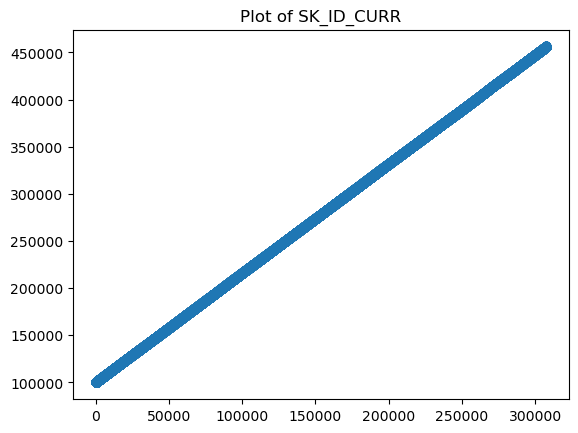

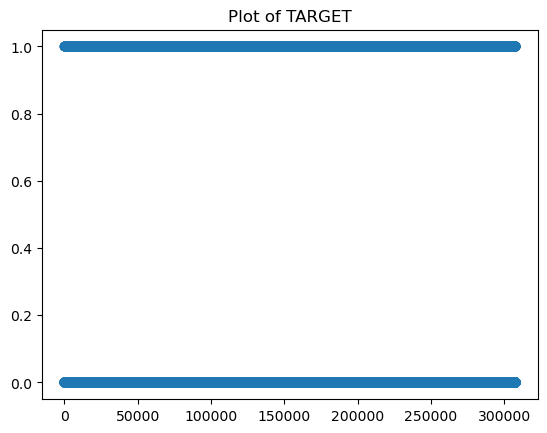

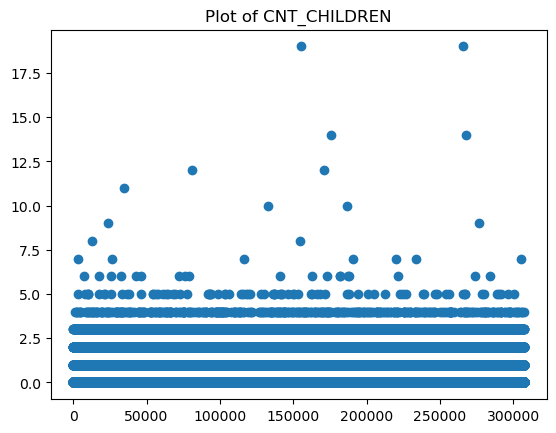

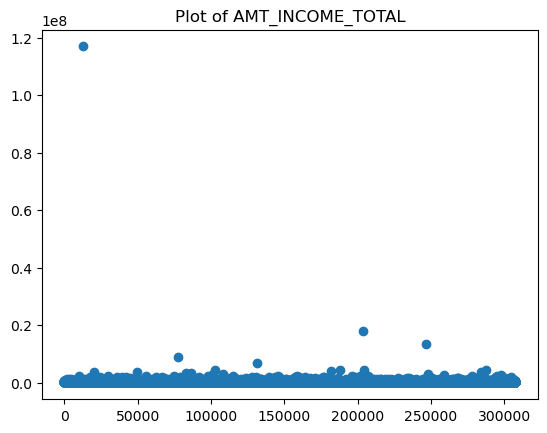

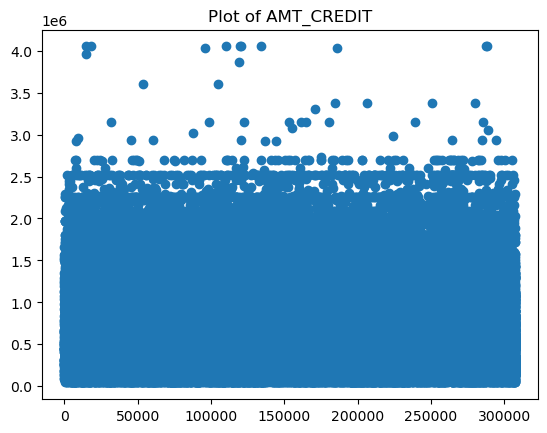

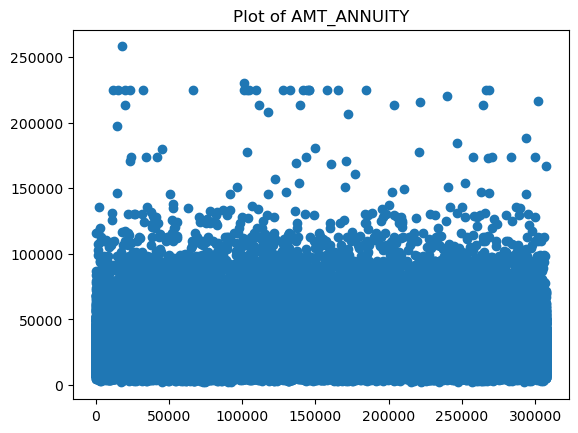

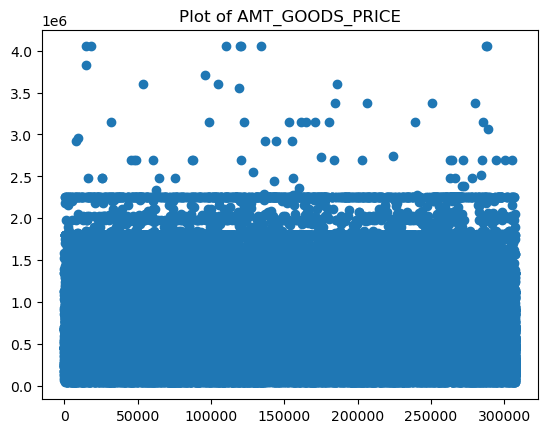

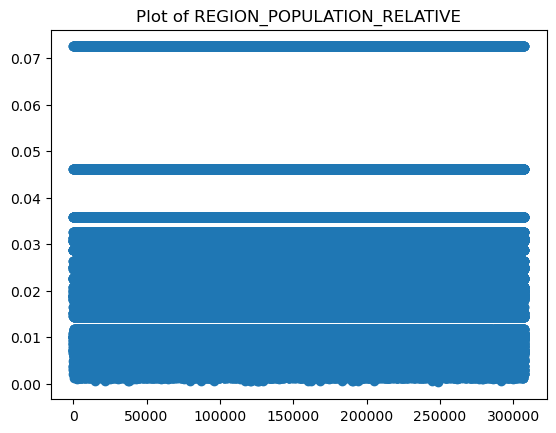

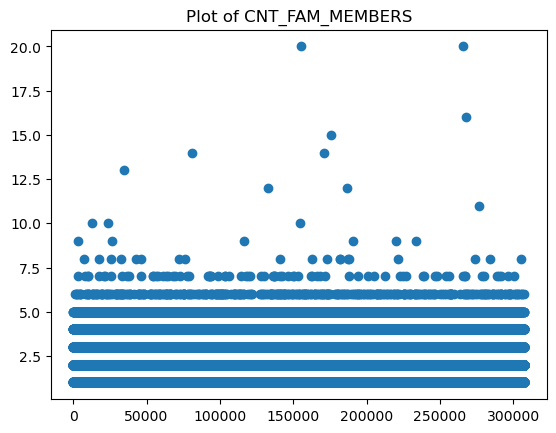

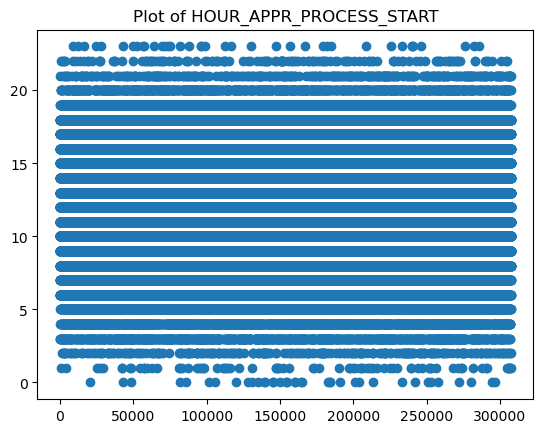

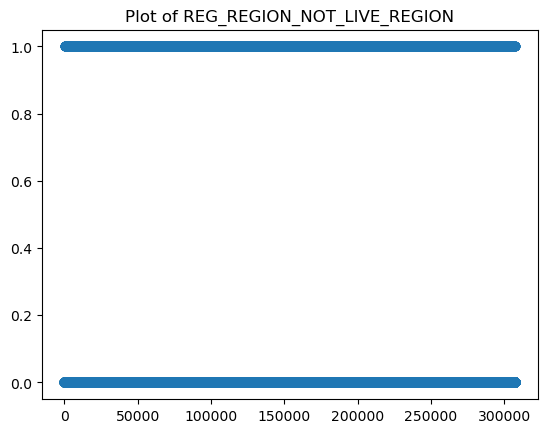

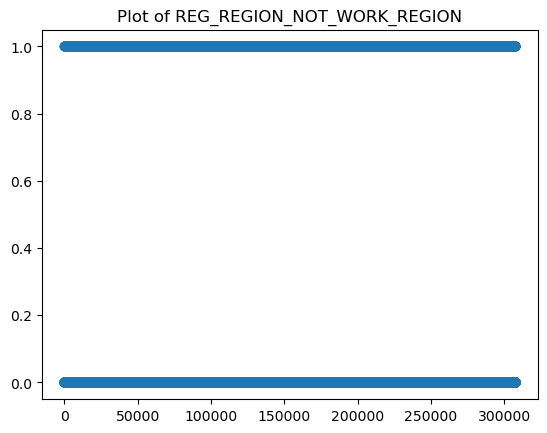

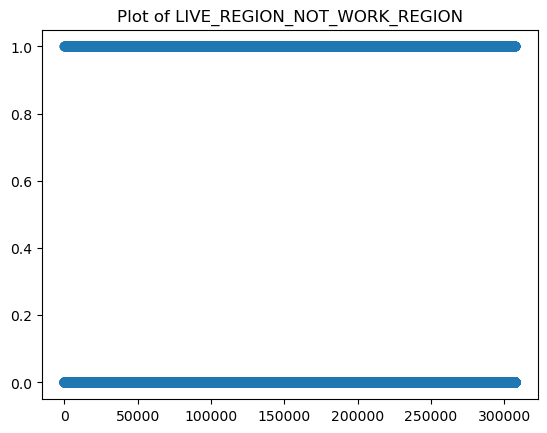

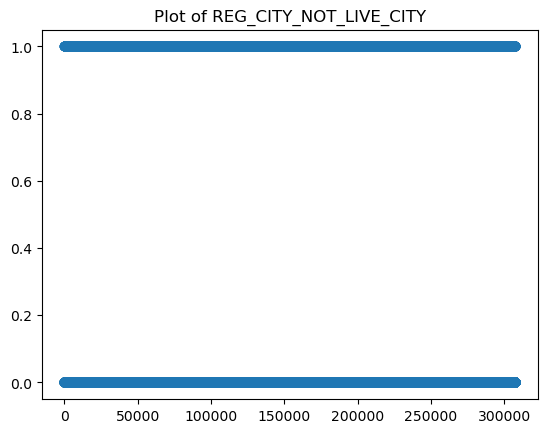

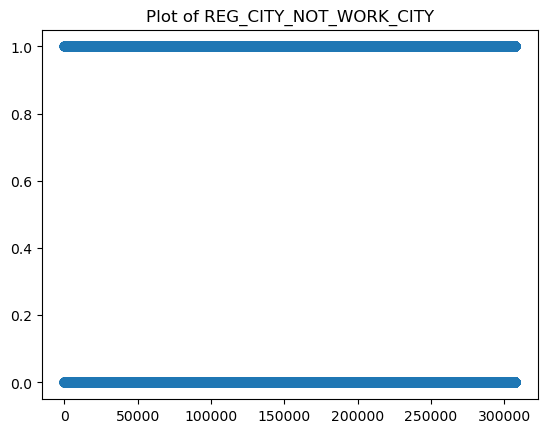

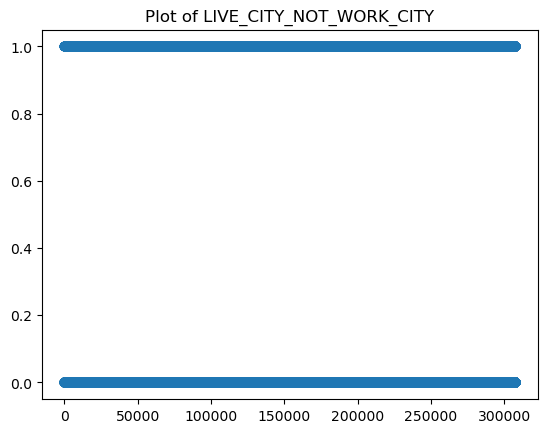

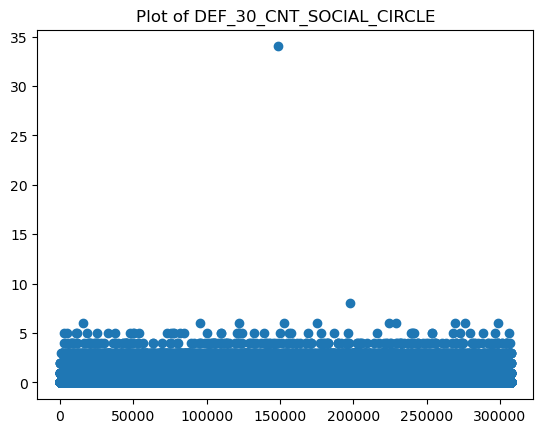

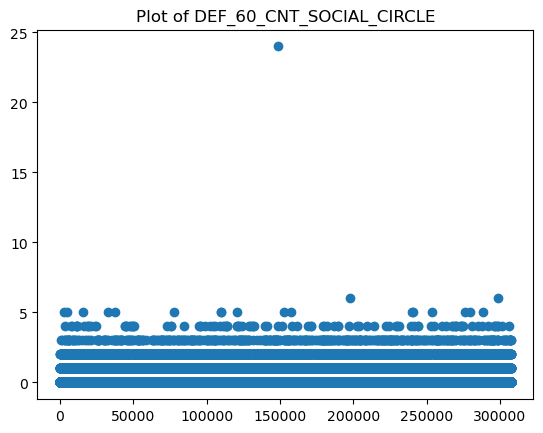

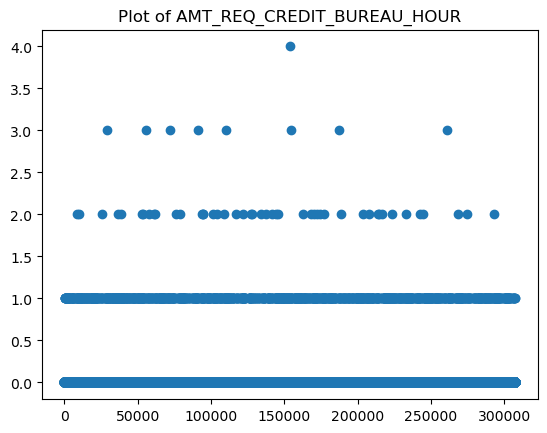

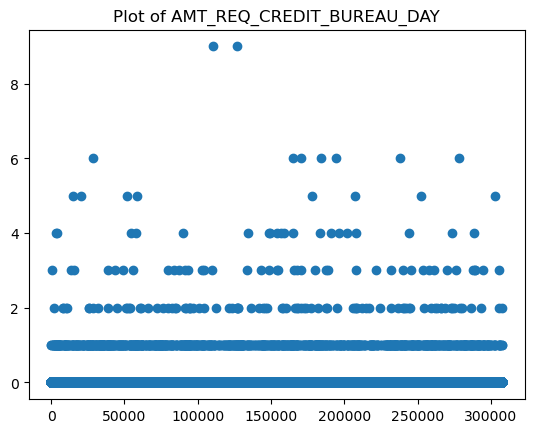

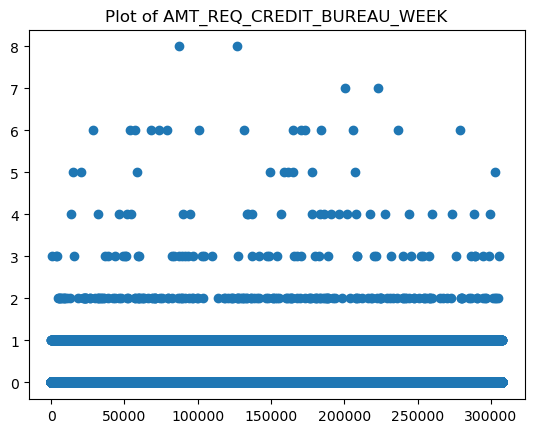

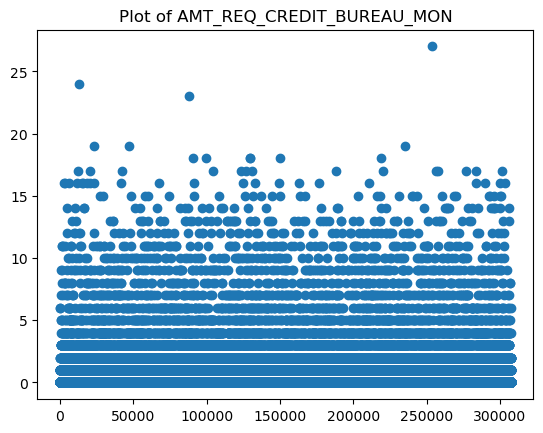

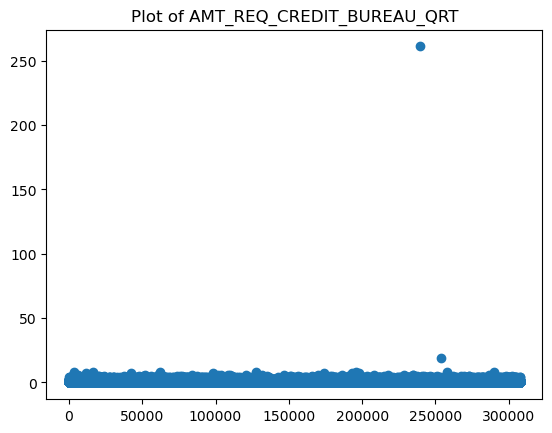

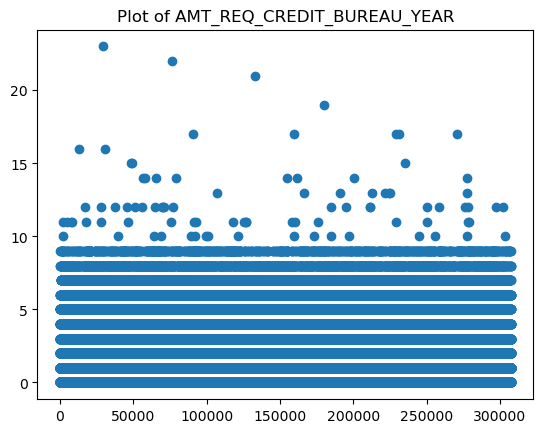

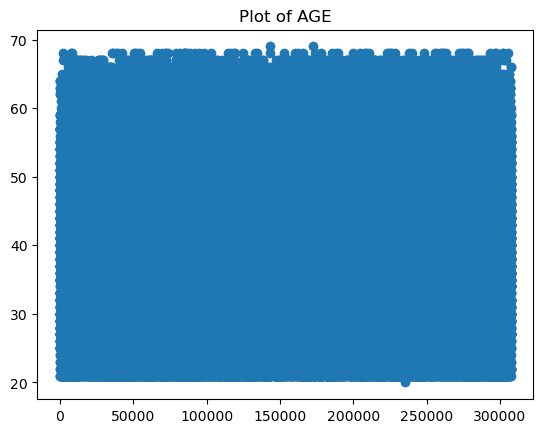

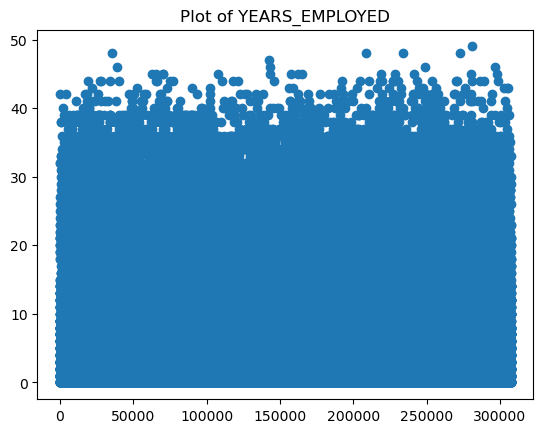

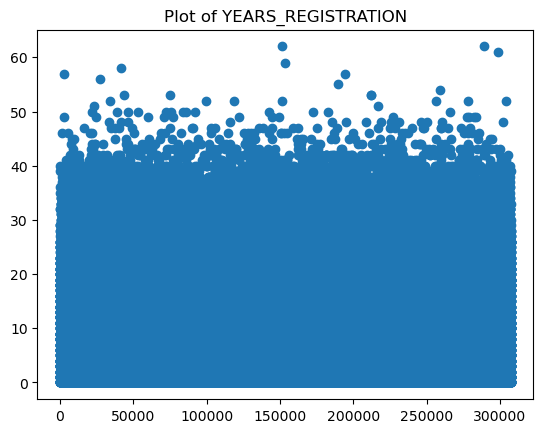

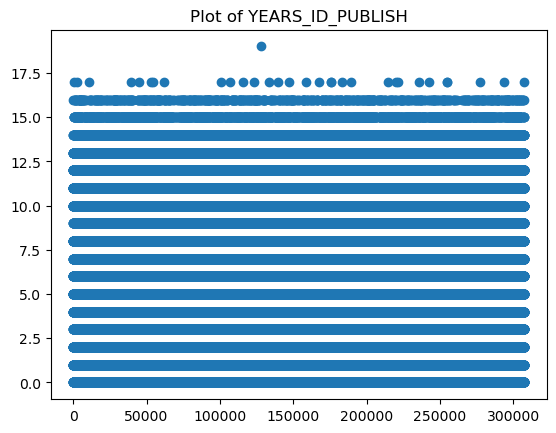

In [57]:
for column in num_col_list:
    title = "Plot of "+column
    plt.scatter(df1.index, df1[column])
    plt.title(title)
    plt.show()

### Analysing the Significant Outliers:

##### Out of 12 numeric columns we see significant outliers in these following columns 
('CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED')

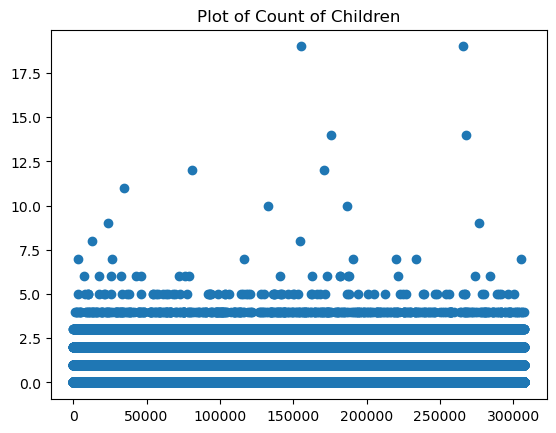

In [58]:
title = "Plot of Count of Children"
plt.scatter(df1.index, df1.CNT_CHILDREN)
plt.title(title)
plt.show()

##### Inferences:
1. Majority of the families has children below 5.
2. There are 19 children in a family, These outliers may reflect unique family structures or cultural dynamics.

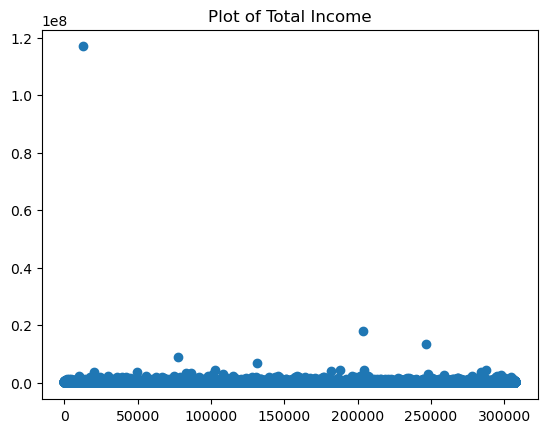

In [59]:
title = "Plot of Total Income"
plt.scatter(df1.index, df1.AMT_INCOME_TOTAL)
plt.title(title)
plt.show()

##### Inferences:
1. Total income have outliers, indicating a presence of individuals with significantly higher incomes compared to the majority.
2. These outliers may represent the high earning professionals, Founder of some organisation.

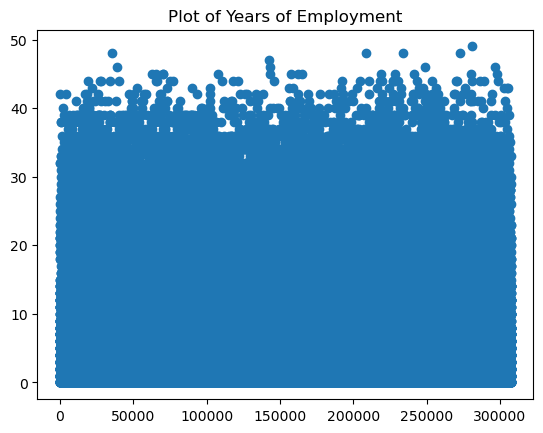

In [60]:
title = "Plot of Years of Employment"
plt.scatter(df1.index, df1.YEARS_EMPLOYED)
plt.title(title)
plt.show()

##### Inferences:
1. These outliers indicates that there are certain employees who has been employed from a long time in the same organisation.
2. This also indicates that there is a lower risk of job loss.

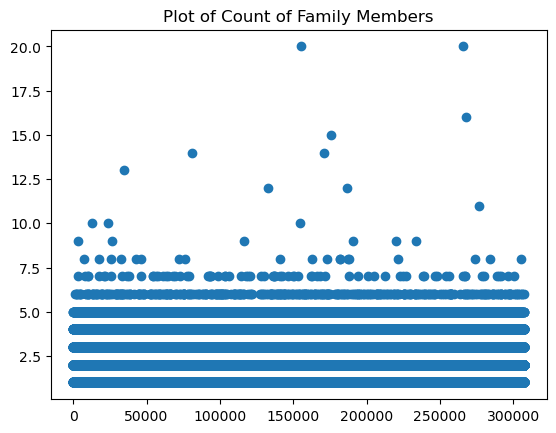

In [61]:
title = "Plot of Count of Family Members"
plt.scatter(df1.index, df1.CNT_FAM_MEMBERS)
plt.title(title)
plt.show()

##### Inferences:
1. Majority of the families has below 7 family members.
2. There are some families who has more than 20 family members, These outliers may reflect joint family or multi-generational family.

### Treating Outliers (Using IQR Method)

In [62]:
# num_col_outlier_treatment = np.array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
#        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
#        'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS'])
# def outlier_treatment(df1,column):
#     q1=df1[column].describe()["25%"]
#     q3=df1[column].describe()["75%"]
#     iqr=q3-q1
#     lower_bound=q1-1.5*iqr
#     upper_bound=q3+1.5*iqr
#     df1[column]=np.where(df1[column]<lower_bound,lower_bound,df1[column])
#     df1[column]=np.where(df1[column]>upper_bound,upper_bound,df1[column])   
#     return df1
# for i in num_col_outlier_treatment:
#     outlier_treatment(df1,i)

In [63]:
# for column in num_col_outlier_treatment:
#     title = "Plot of "+column
#     plt.scatter(df1.index, df1[column])
#     plt.title(title)
#     plt.show()

## 4. Binning Continous Variable for better Analysis

In [64]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [65]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=slots)


In [66]:
# Creating bins for YEARS_EMPLOYED
bins = [0,5,10,15,20,25,30]
slots = ['0-5 years','5-10 years','10-15 years','15-20 years','20-25 year','25+ years']
df1['YEARS_EMPLOYED_CATEGORICAL']=pd.cut(df1['YEARS_EMPLOYED'],bins=bins,labels=slots)

## 5. Converting Numerial Variable to Categorical Variable for better analysis

In [67]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

df1['AMT_ANNUITY_CATEGORICAL'] = df1['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

In [68]:
def age_categorical(x):
    if x <= 18:
        return 'Teens'
    elif x > 18 and x <=30:
        return 'Young Adults'
    elif x > 30 and x <=50:
        return 'Middle-aged Adults'
    else:
        return 'Senior Citizens'

df1['AGE_CATEGORICAL'] = df1['AGE'].apply(lambda x: age_categorical(x))

## 6. TARGET Imbalance

In [69]:
round(df1.TARGET.value_counts(normalize=True)*100,2)

0    91.34
1     8.66
Name: TARGET, dtype: float64

##### Percentage of Target 0 count is 91.34 & percentage of Target 1 count is 8.66
#### Imbalance Ratio (IR) = (Number of Majority Class Samples) / (Number of Minority Class Samples)

In [70]:
numerator = df1.TARGET[df1["TARGET"]==0].value_counts()[0]
denominator = df1.TARGET[df1["TARGET"]==1].value_counts()[1]
IR = round((numerator/denominator),2)
print('Imbalance Ratio is ', IR)

Imbalance Ratio is  10.55


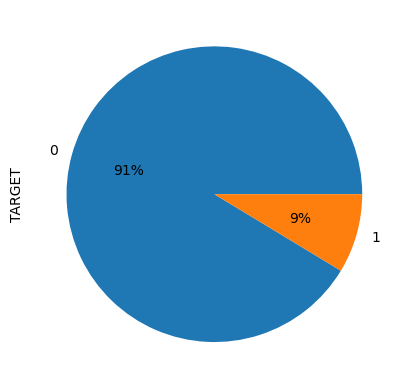

In [71]:
df1.TARGET.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

## 7. Splitting the dataframe into 2 dataframes based on Target Variable for better Analysis

#### Note:
- (a) Target = 1, represents Defaulters
- (b) Target = 0, represents Non-Defaulters 

In [72]:
# Client with payment difficulties (Target=1)
df_current_target_1 = df1[df1['TARGET'] == 1]
df_current_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
94      100112       1         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
94               Y             0          315000.0    953460.0      64107.0   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
94         900000.0          Family  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
94              Incomplete higher  Single / not married       With parents   

    REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                     0.018801        Laborers              1.0   
26                    0.018029   Cooking staff              1.0   
40                    0.025164        Laborers              2.0   
42                    0.007305     Sales staff              2.0   
94                    0.030755         Unknown              1.0   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
94                     SUNDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
94                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
94                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                       0                        0           Self-employed   
94                       1                        1        Industry: type 4   

    DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
26                       1.0                       0.0   
40                       0.0                       0.0   
42                       0.0                       0.0   
94                       0.

In [73]:
#  Client with No payment difficulties (Target=0)
df_current_target_0 = df1[df1['TARGET'] == 0]
df_current_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   
5                    0.035792        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0                        0                   Other   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREA

## 8. Univariate Analysis 

In [74]:
# Plotting two countplots for delaulters and non defaulters
def univariate_countplot(col):
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)    
    ax = sns.countplot(x = col,data=df_current_target_1)
    plt.xticks(rotation=45)
    plt.title('Defaulters')
    ax.set(xlabel=col)

    plt.subplot(1,2,2) 
    ax = sns.countplot(x = col,data=df_current_target_0)
    plt.xticks(rotation=45)
    plt.title('Non-Defaulters')
    ax.set(xlabel=col)
    
    plt.show()

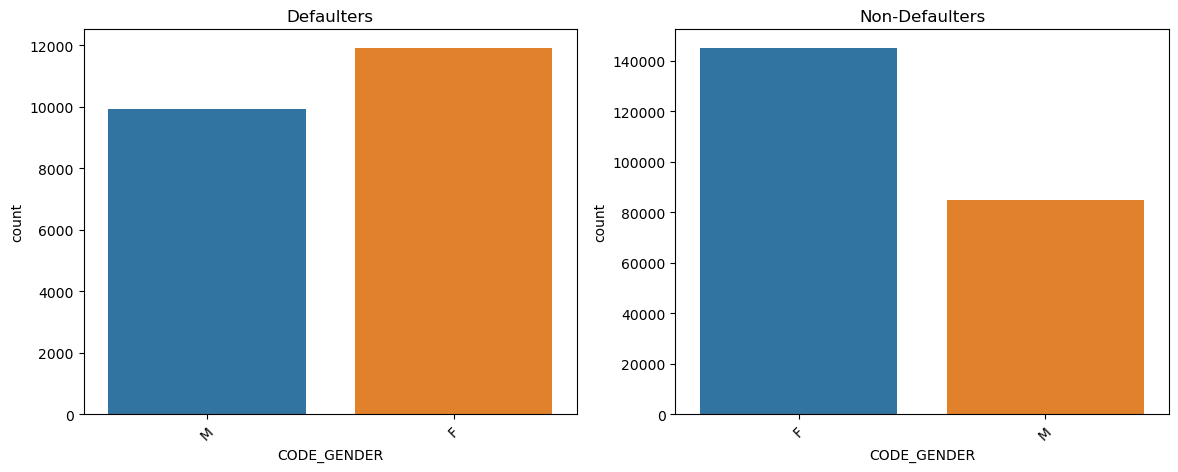

In [75]:
univariate_countplot('CODE_GENDER')

#### Inference:
- It is observed that the count of females are slightly more than males as Defaulters.
- It is observed that the count of females are slightly more than males as Non-Defaulters.

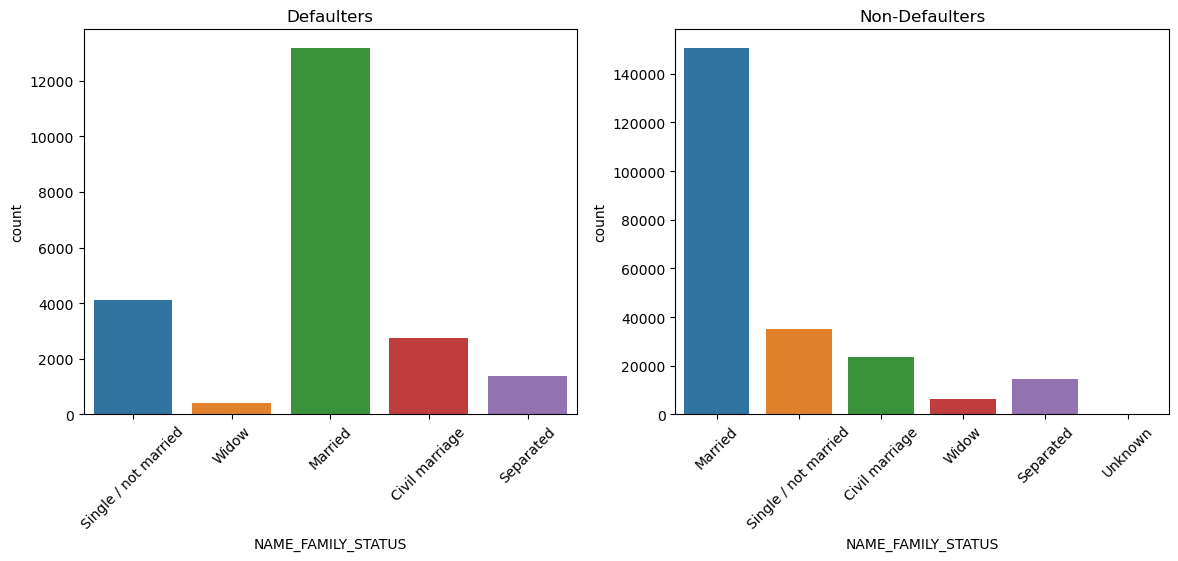

In [76]:
univariate_countplot('NAME_FAMILY_STATUS')

##### Inferences:
- It is observed that the count of married are significantly higher as Defaulters & Widow are the least defaulters than any other family status.
- It is observed the similar pattern for non-defaulters, married peoples are high as non-defaulters and widow as the least.


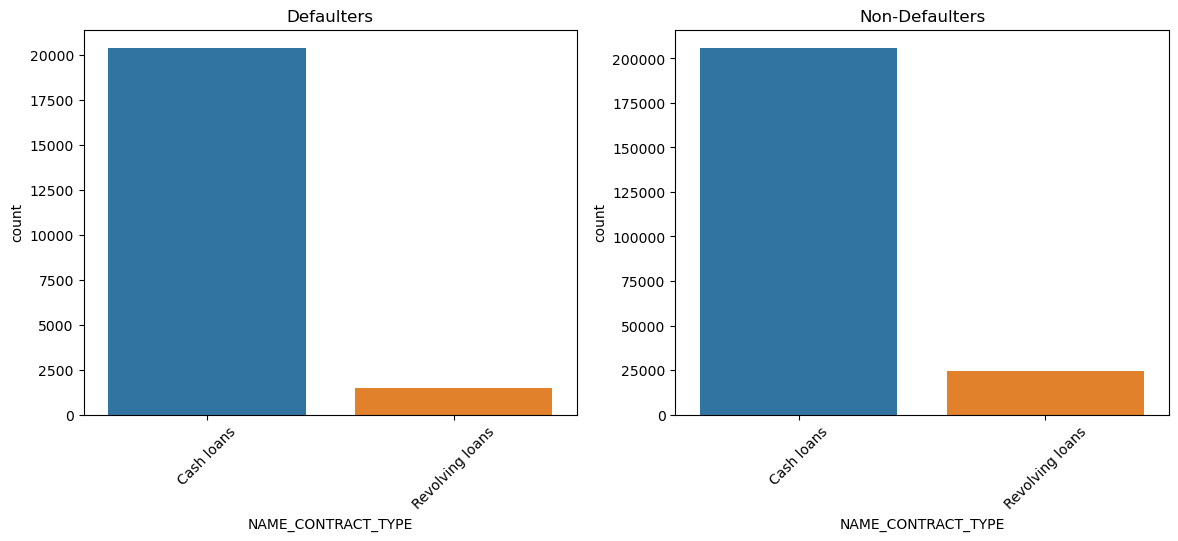

In [77]:
univariate_countplot('NAME_CONTRACT_TYPE')

##### Inference:
- We see in both the cases that Revolving loans are very less in number compared to Cash loans.

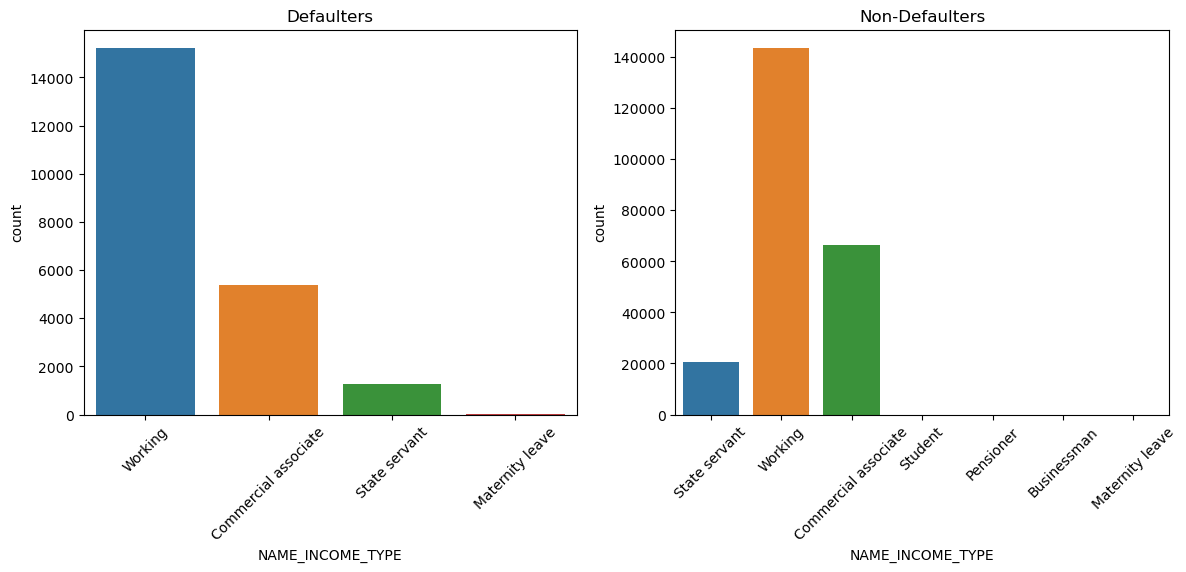

In [78]:
univariate_countplot('NAME_INCOME_TYPE')

##### Inferences:
- Defaulters: Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
- Non-defaulters: Similarly here also working people are more in number who are not defaulted.

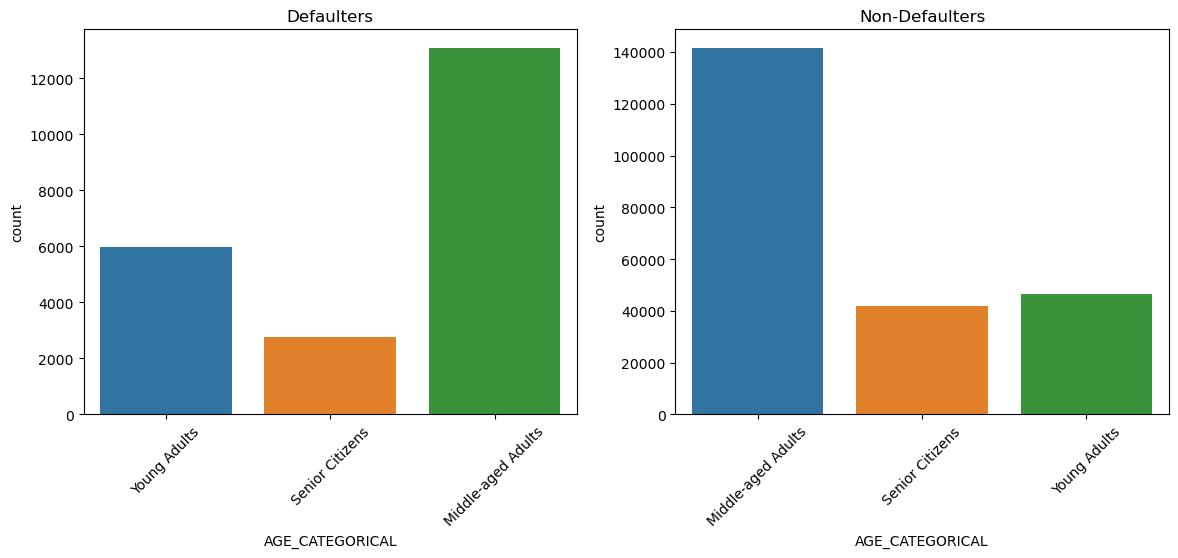

In [79]:
univariate_countplot('AGE_CATEGORICAL')

##### Inferences:
- It is observed that Senior Citizens are compared to be less defaulters than young and middle aged youths.
- Middle Aged youth are the least defaulters.
- Young adults are seems to be more defaulter than the non-defaulter.


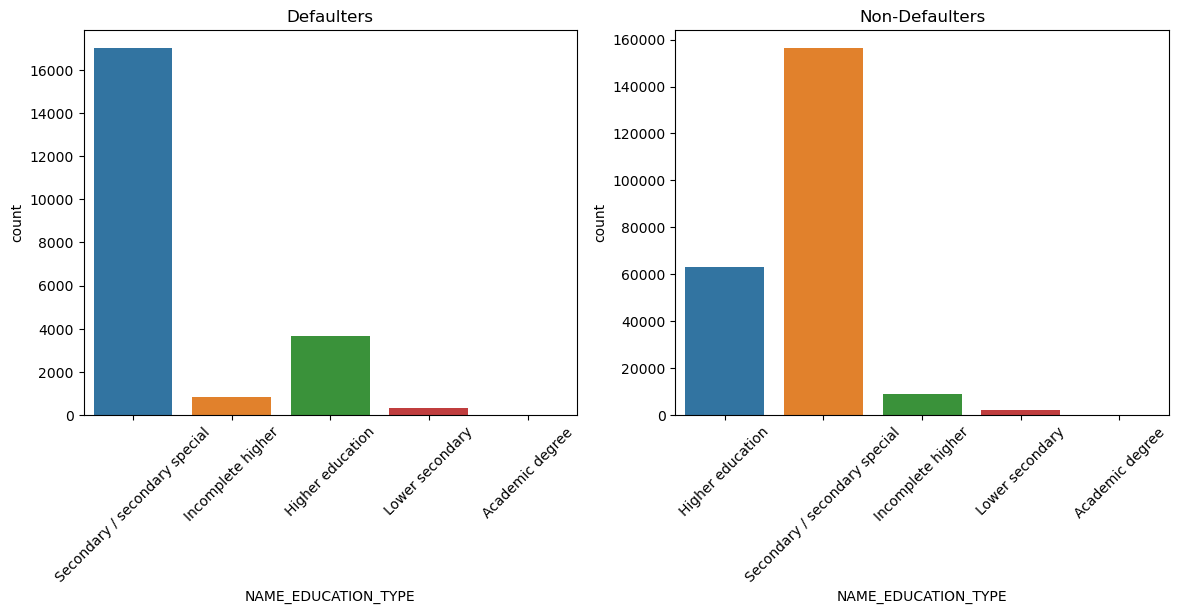

In [80]:
univariate_countplot('NAME_EDUCATION_TYPE')

##### Inferences:
- It is observed that applicants having education type ‘secondary/secondary special’ are more likely to be defaulters than the non-defaulters.
- Applicants having education type ‘Higher Education’ are more likely to be Non-defaulters than the defaulters.
- Applicants with lower education level tends to take less loan.

In [81]:
# Plotting two countplots for delaulters and non defaulters
def univariate_distplot(col):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1) 
    plt.title('Defaulters')
    sns.distplot(df_current_target_1[col],hist=True)

    plt.subplot(1,2,2) 
    plt.title('Non Defaulters')
    sns.distplot(df_current_target_0[col],hist=True)

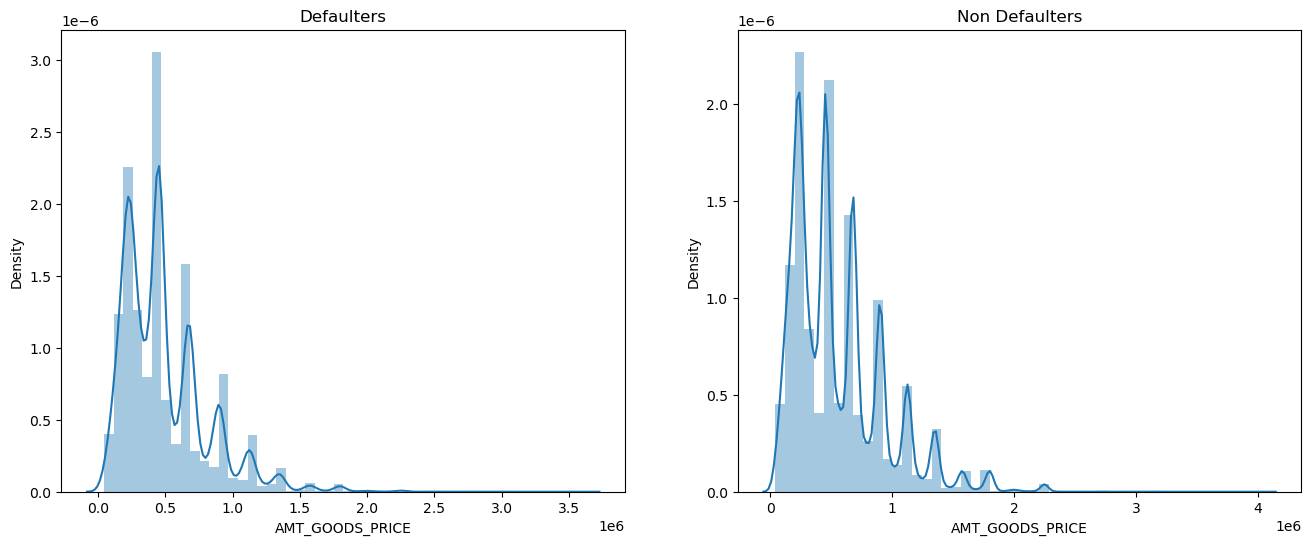

In [82]:
univariate_distplot('AMT_GOODS_PRICE')

##### Inferences:
- It is observed that applicants having higher goods price tends to be more defaulter than non-defaulters.
- When goods price are between 0-5,00,000. Applicants seems to be more non-defaulter than defaulters.


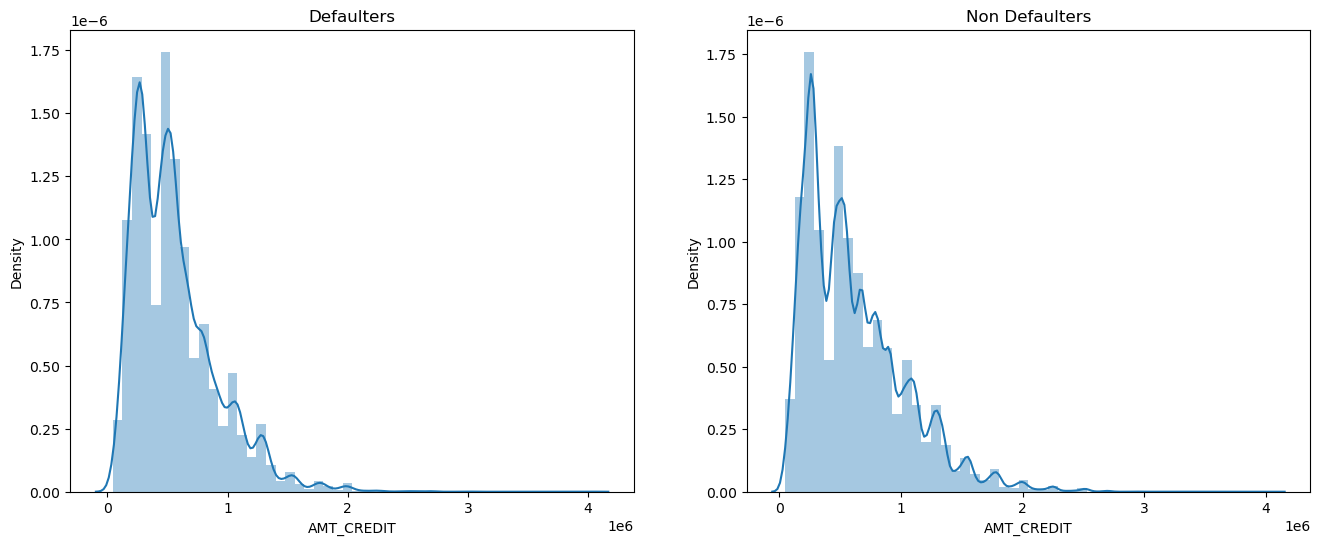

In [83]:
univariate_distplot('AMT_CREDIT')

##### Inferences:
- It is observed that, credit amount is slightly higher for non defaulters.
- applicants having higher credited amount tends to be more defaulter than non-defaulters.

## 9. Bivariate Analysis

In [84]:
 def bivariate_boxplot(col1,col2):
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)    
    ax = sns.boxplot(x = col1, y = col2, data=df_current_target_1)
    plt.xticks(rotation=45)
    plt.title('Defaulters')

    plt.subplot(1,2,2) 
    ax = sns.boxplot(x = col1, y = col2, data=df_current_target_0)
    plt.xticks(rotation=45)
    plt.title('Non-Defaulters')
    
    plt.show()

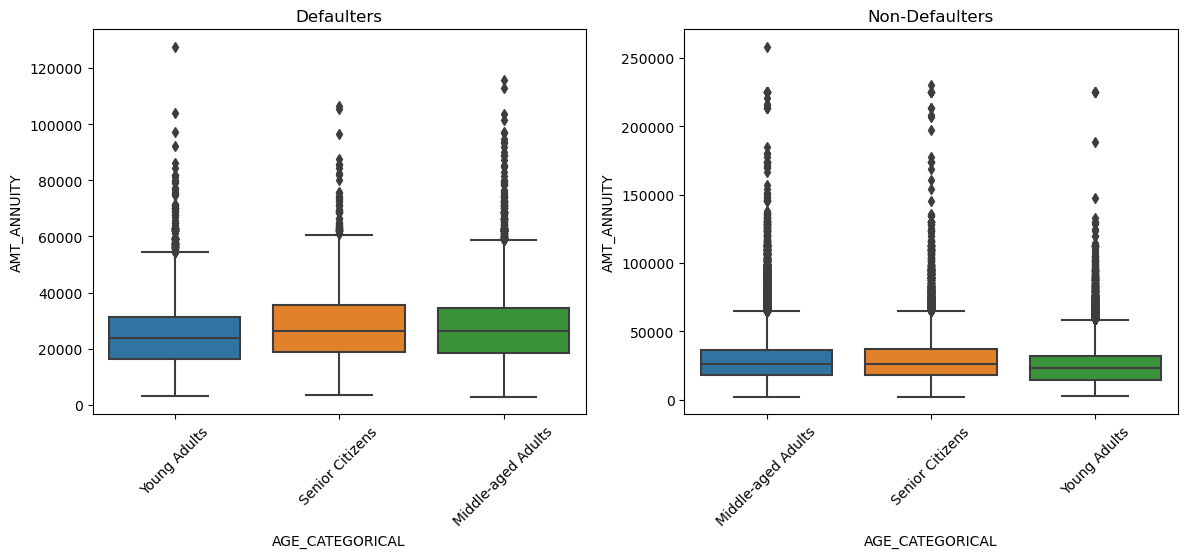

In [85]:
bivariate_boxplot('AGE_CATEGORICAL','AMT_ANNUITY')

##### Inferences:
- Here we observe that overall, middle aged adults have the highest annuity loan and tends to be more non-defaulter.
- Whereas, young adults  has moderate annuity and tends to be more defaulter

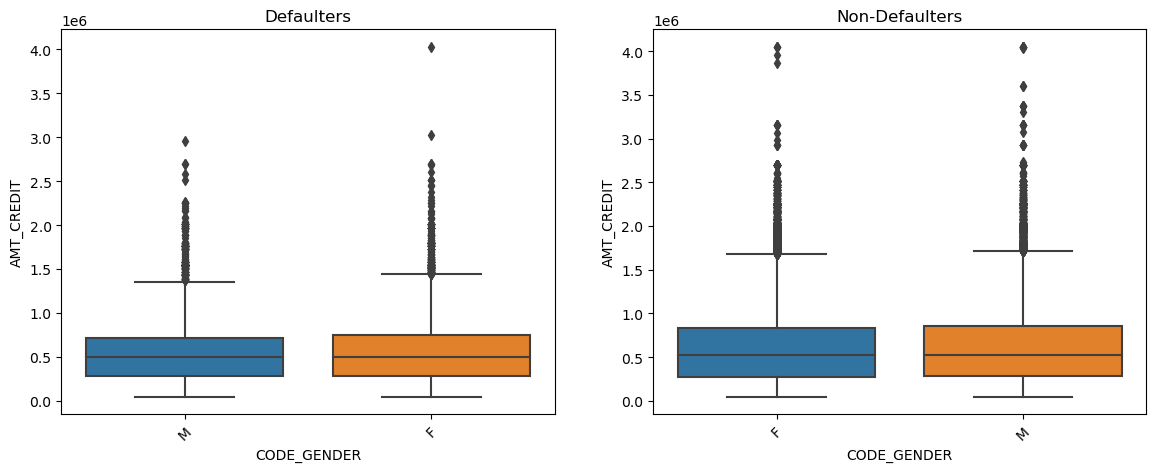

In [86]:
bivariate_boxplot('CODE_GENDER','AMT_CREDIT')

##### Inferences:
- It is observed females when credited with more amount tends to be a defaulter than males.
- The most amount is credited to males and are least defaulters.


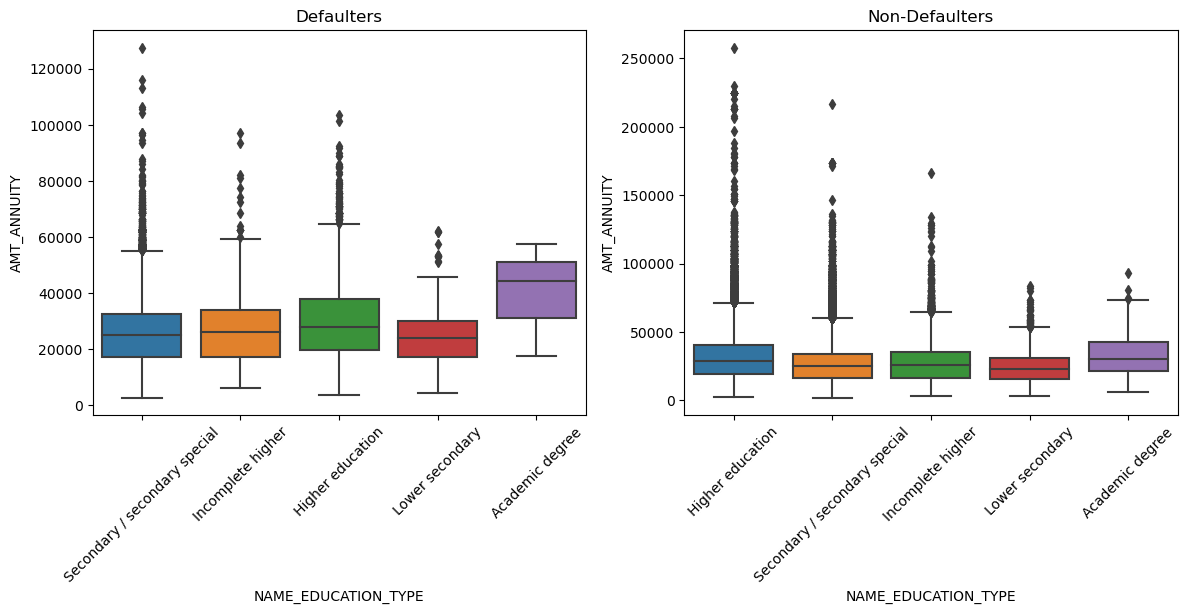

In [87]:
bivariate_boxplot('NAME_EDUCATION_TYPE','AMT_ANNUITY')

##### Inferences:
- It is observed that applicants with lower-secondary education has the least annuity and tends to be more defaulter.
- Applicants with Higher education has more annuity and tends to be defaulter.
- Applicants with secondary/secondary special education type has the maximum annuity and tends to be least defaulters


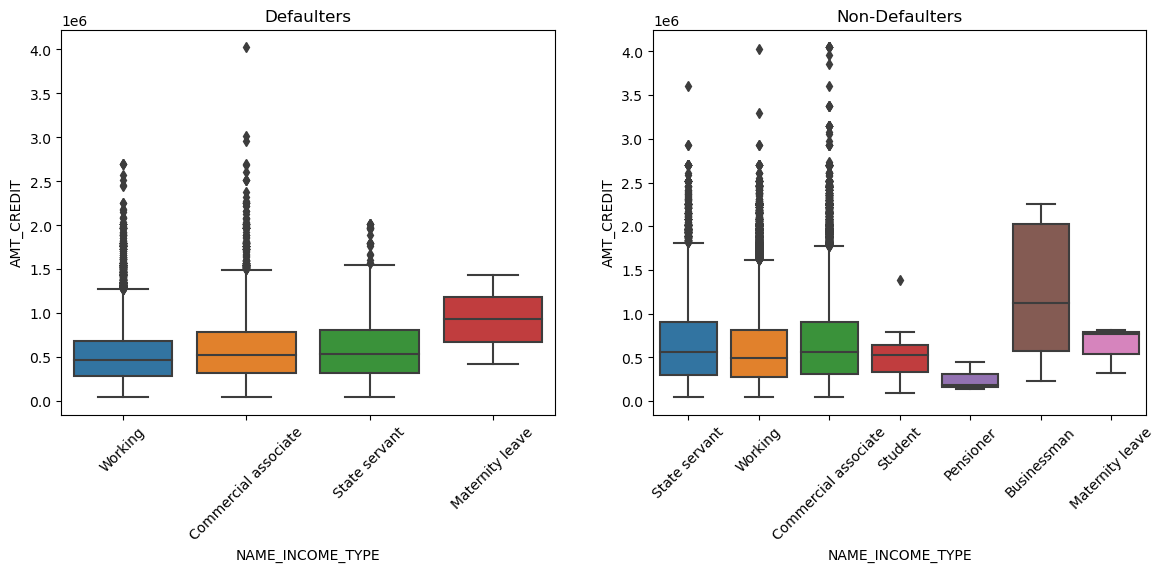

In [88]:
bivariate_boxplot('NAME_INCOME_TYPE','AMT_CREDIT')

##### Inferences:
- Here we observe that businessman gets the most amount of loan and also very unlikely to be defaulters.

In [89]:
def bivariate_scatterplot(col1,col2,col3):
    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    ax = sns.scatterplot(x=col1, y=col2, hue = col3, data=df_current_target_1)
    plt.title('Defaulters')

    plt.subplot(1,2,2)
    ax = sns.scatterplot(x=col1, y=col2, hue = col3, data=df_current_target_0)
    plt.title('Non Defaulters')
    
    plt.show()

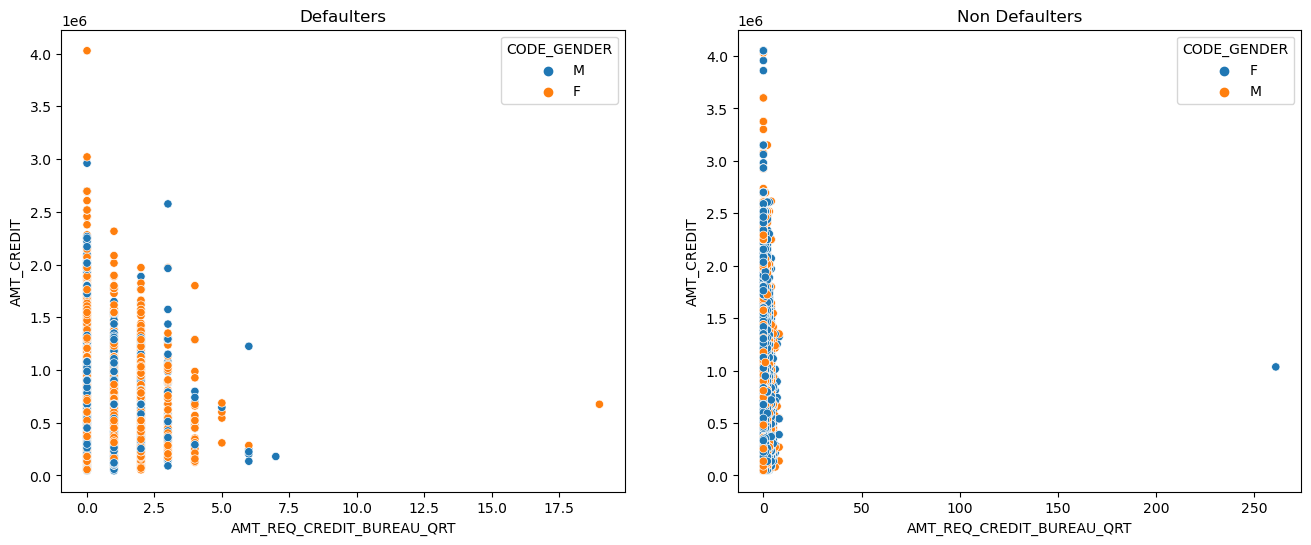

In [90]:
bivariate_scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT','CODE_GENDER')

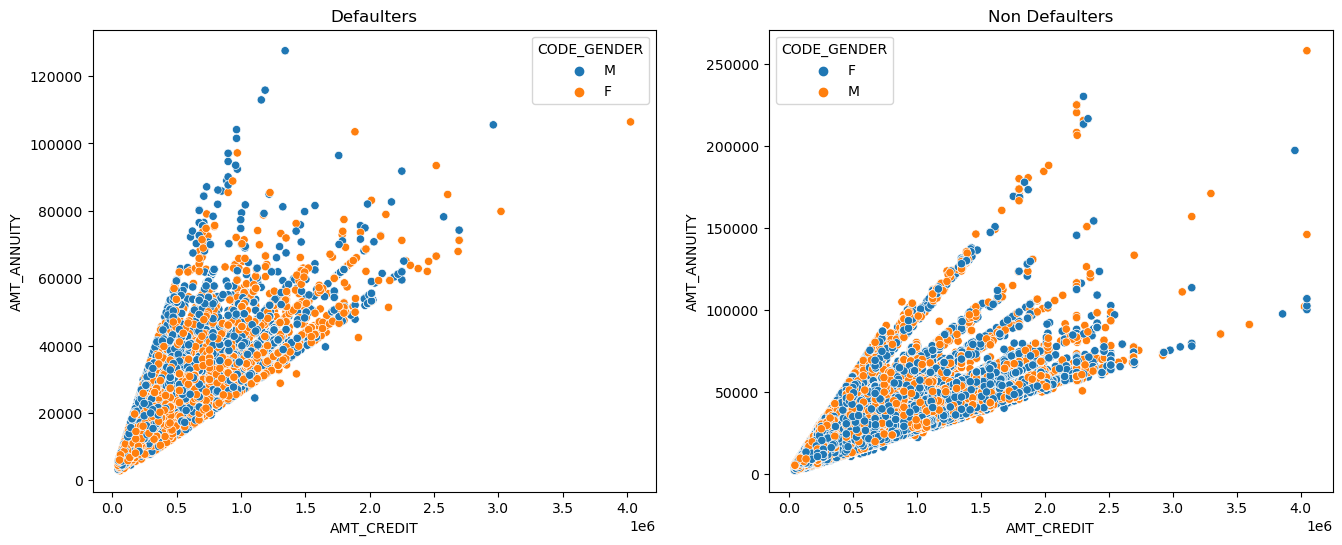

In [91]:
bivariate_scatterplot('AMT_CREDIT','AMT_ANNUITY','CODE_GENDER')

##### Inferences:
- It is observed that, when credited amount increases annuity also increases.
- when credited amount lies between 200000-400000 and annuity lies between 60000-120000, applicants tends to be more defaulter.
- In comparison to males, females are more likely to be defaulter.


## 10. Correlation

In [92]:
df1.select_dtypes(include = ['float64', 'int64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object')

In [93]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
             'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 
             'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY']

# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_0 = df_current_target_0[corr_cols]

In [94]:
# Corelation matrix for target 1
df_corr_target_1.corr()

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_CREDIT                     1.000000     0.748708         0.982464   
AMT_ANNUITY                    0.748708     1.000000         0.748940   
AMT_GOODS_PRICE                0.982464     0.748940         1.000000   
CNT_CHILDREN                  -0.002074     0.015653        -0.007710   
CNT_FAM_MEMBERS                0.045420     0.054884         0.042143   
DEF_60_CNT_SOCIAL_CIRCLE      -0.034792    -0.027431        -0.029302   
DEF_30_CNT_SOCIAL_CIRCLE      -0.031438    -0.024091        -0.026744   
REG_REGION_NOT_LIVE_REGION     0.020083     0.033311         0.023567   
REG_REGION_NOT_WORK_REGION     0.035695     0.063242         0.039452   
LIVE_REGION_NOT_WORK_REGION    0.035966     0.061609         0.038509   
LIVE_CITY_NOT_WORK_CITY       -0.017875    -0.006806        -0.017118   
REG_CITY_NOT_LIVE_CITY        -0.035325    -0.013834        -0.035596   
REG_CITY_NOT_WORK_CITY        -0.041392    -0.019728        -0.041532   

                             CNT_CHILDREN  CNT_FAM_MEMBERS  \
AMT_CREDIT                      -0.002074         0.045420   
AMT_ANNUITY                      0.015653         0.054884   
AMT_GOODS_PRICE                 -0.007710         0.042143   
CNT_CHILDREN                     1.000000         0.893829   
CNT_FAM_MEMBERS                  0.893829         1.000000   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003162         0.002448   
DEF_30_CNT_SOCIAL_CIRCLE         0.003023         0.009726   
REG_REGION_NOT_LIVE_REGION      -0.032465        -0.034419   
REG_REGION_NOT_WORK_REGION      -0.039498        -0.045532   
LIVE_REGION_NOT_WORK_REGION     -0.028031        -0.033116   
LIVE_CITY_NOT_WORK_CITY          0.016332         0.026055   
REG_CITY_NOT_LIVE_CITY          -0.019278        -0.023800   
REG_CITY_NOT_WORK_CITY          -0.000876         0.000693   

                             DEF_60_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.034792   
AMT_ANNUITY                                 -0.027431   
AMT_GOODS_PRICE                             -0.029302   
CNT_CHILDREN                                -0.003162   
CNT_FAM_MEMBERS                              0.002448   
DEF_60_CNT_SOCIAL_CIRCLE                     1.000000   
DEF_30_CNT_SOCIAL_CIRCLE                     0.867983   
REG_REGION_NOT_LIVE_REGION                   0.001399   
REG_REGION_NOT_WORK_REGION                  -0.014279   
LIVE_REGION_NOT_WORK_REGION                 -0.020467   
LIVE_CITY_NOT_WORK_CITY                     -0.020295   
REG_CITY_NOT_LIVE_CITY                       0.014522   
REG_CITY_NOT_WORK_CITY                      -0.004028   

                             DEF_30_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.031438   
AMT_ANNUITY                                 -0.024091   
AMT_GOODS_PRICE                             -0.026744   
CNT_CHILDREN                                 0.003023   
CNT_FAM_MEMBERS                              0.009726   
DEF_60_CNT_SOCIAL_CIRCLE                     0.867983   
DEF_30_CNT_SOCIAL_CIRCLE                     1.000000   
REG_REGION_NOT_LIVE_REGION                   0.002143   
REG_REGION_NOT_WORK_REGION                  -0.016468   
LIVE_REGION_NOT_WORK_REGION                 -0.022266   
LIVE_CITY_NOT_WORK_CITY                     -0.017725   
REG_CITY_NOT_LIVE_CITY                       0.013191   
REG_CITY_NOT_WORK_CITY                      -0.005638   

                             REG_REGION_NOT_LIVE_REGION  \
AMT_CREDIT                                     0.020083   
AMT_ANNUITY                                    0.033311   
AMT_GOODS_PRICE                                0.023567   
CNT_CHILDREN                                  -0.032465   
CNT_FAM_MEMBERS                               -0.034419   
DEF_60_CNT_SOCIAL_CIRCLE                       0.001399   
DEF_30_CNT_SOCIAL_CIRCLE                       0.002143   
REG_REGION_NOT_LIVE_REGION                     1.000000   
REG_REGI

In [95]:
correlations_with_target_1 = df_corr_target_1.corr()
top_10_correlations_with_target_1 = correlations_with_target_1.unstack().sort_values(ascending=False)
top_10_correlations_with_target_1 = top_10_correlations_with_target_1[top_10_correlations_with_target_1.index.get_level_values(0) != top_10_correlations_with_target_1.index.get_level_values(1)]
top_10_correlations_with_target_1 = top_10_correlations_with_target_1.head(20)


top_10_correlations_with_target_1

AMT_CREDIT                   AMT_GOODS_PRICE                0.982464
AMT_GOODS_PRICE              AMT_CREDIT                     0.982464
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867983
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867983
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.768247
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.768247
AMT_GOODS_PRICE              AMT_ANNUITY                    0.748940
AMT_ANNUITY                  AMT_GOODS_PRICE                0.748940
AMT_CREDIT                   AMT_ANNUITY                    0.748708
AMT_ANNUITY                  AMT_CREDIT                     0.748708
REG_REGION_NOT_LIVE_REGION   REG_R

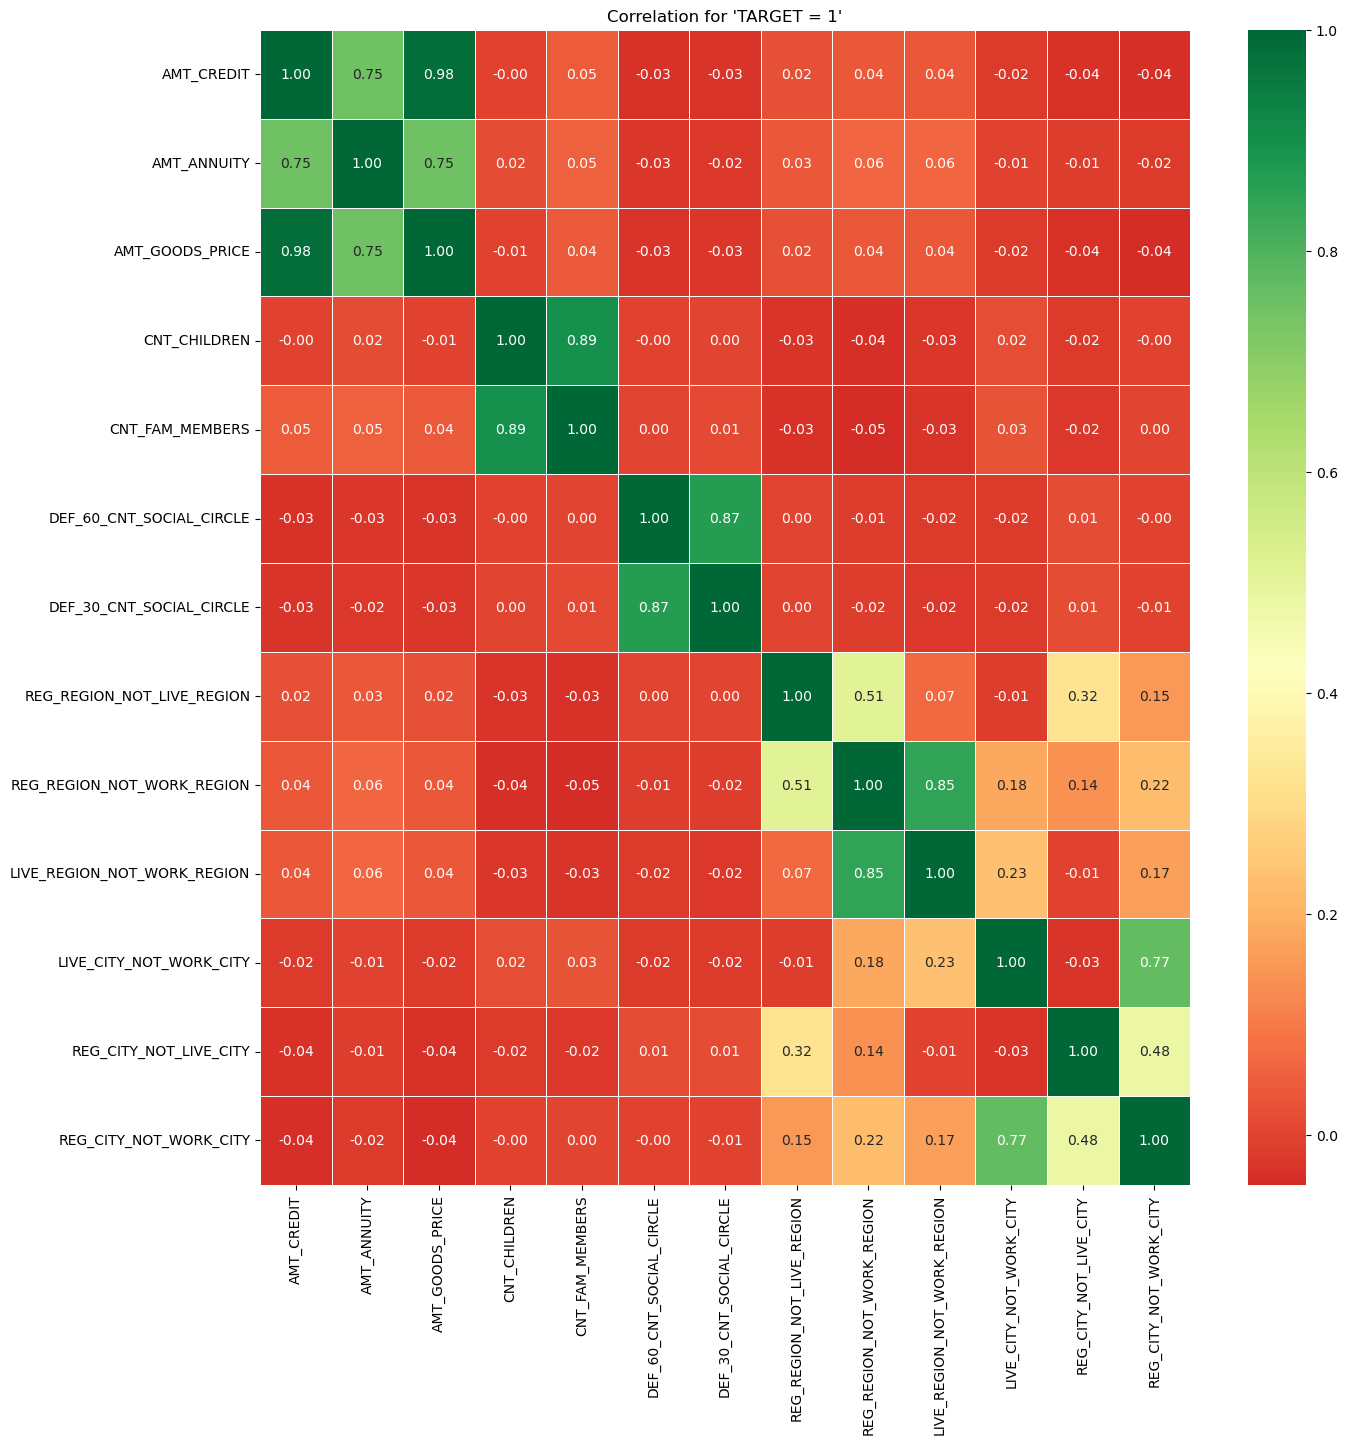

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr_target_1.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, center = 0.421)
plt.title("Correlation for 'TARGET = 1'")
plt.show()

###### Top 10 Correlations for Target 1 (Defaulter):
- AMT_ CREDIT and AMT_GOODS_PRICE has a positive correlation of 0.982464
- CNT_CHILDREN and CNT_FAM_MEMBERS has a positive correlation of 0.893829
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE has a positive correlation of 0.867983
- LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of 0.846872
- REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY has a positive correlation of 0.768247
- AMT_GOODS_PRICE and AMT_ ANNUITY has a positive correlation of 0.748940 
- AMT_CREDIT and AMT_ANNUITY has a positive correlation of 0.748708
- REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of has a positive correlation of 0.506747
- REG_CITY_NOT_LIVE_CITY and REG_CITY_NOT_WORK_CITY has a positive correlation of 0.478266
- REG_REGION_NOT_LIVE_REGION and REG_CITY_NOT_LIVE_CITY has a positive correlation of 0.322030

In [97]:
# Corelation matrix for target 0
df_corr_target_0.corr()

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_CREDIT                     1.000000     0.762117         0.986471   
AMT_ANNUITY                    0.762117     1.000000         0.766669   
AMT_GOODS_PRICE                0.986471     0.766669         1.000000   
CNT_CHILDREN                  -0.018704    -0.007619        -0.022293   
CNT_FAM_MEMBERS                0.036760     0.041225         0.034889   
DEF_60_CNT_SOCIAL_CIRCLE      -0.023820    -0.023707        -0.024749   
DEF_30_CNT_SOCIAL_CIRCLE      -0.021726    -0.022808        -0.023078   
REG_REGION_NOT_LIVE_REGION     0.020979     0.039764         0.023545   
REG_REGION_NOT_WORK_REGION     0.050597     0.076067         0.052040   
LIVE_REGION_NOT_WORK_REGION    0.052028     0.071648         0.052311   
LIVE_CITY_NOT_WORK_CITY       -0.014834    -0.014264        -0.015814   
REG_CITY_NOT_LIVE_CITY        -0.037527    -0.018908        -0.036943   
REG_CITY_NOT_WORK_CITY        -0.038517    -0.028969        -0.039250   

                             CNT_CHILDREN  CNT_FAM_MEMBERS  \
AMT_CREDIT                      -0.018704         0.036760   
AMT_ANNUITY                     -0.007619         0.041225   
AMT_GOODS_PRICE                 -0.022293         0.034889   
CNT_CHILDREN                     1.000000         0.893275   
CNT_FAM_MEMBERS                  0.893275         1.000000   
DEF_60_CNT_SOCIAL_CIRCLE         0.002439        -0.000739   
DEF_30_CNT_SOCIAL_CIRCLE         0.003481         0.001760   
REG_REGION_NOT_LIVE_REGION      -0.023033        -0.027396   
REG_REGION_NOT_WORK_REGION      -0.016798        -0.021709   
LIVE_REGION_NOT_WORK_REGION     -0.006946        -0.009416   
LIVE_CITY_NOT_WORK_CITY          0.018414         0.028995   
REG_CITY_NOT_LIVE_CITY          -0.001566        -0.009020   
REG_CITY_NOT_WORK_CITY           0.010369         0.013097   

                             DEF_60_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.023820   
AMT_ANNUITY                                 -0.023707   
AMT_GOODS_PRICE                             -0.024749   
CNT_CHILDREN                                 0.002439   
CNT_FAM_MEMBERS                             -0.000739   
DEF_60_CNT_SOCIAL_CIRCLE                     1.000000   
DEF_30_CNT_SOCIAL_CIRCLE                     0.861492   
REG_REGION_NOT_LIVE_REGION                  -0.008586   
REG_REGION_NOT_WORK_REGION                  -0.017964   
LIVE_REGION_NOT_WORK_REGION                 -0.016884   
LIVE_CITY_NOT_WORK_CITY                      0.001308   
REG_CITY_NOT_LIVE_CITY                       0.008602   
REG_CITY_NOT_WORK_CITY                       0.006105   

                             DEF_30_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.021726   
AMT_ANNUITY                                 -0.022808   
AMT_GOODS_PRICE                             -0.023078   
CNT_CHILDREN                                 0.003481   
CNT_FAM_MEMBERS                              0.001760   
DEF_60_CNT_SOCIAL_CIRCLE                     0.861492   
DEF_30_CNT_SOCIAL_CIRCLE                     1.000000   
REG_REGION_NOT_LIVE_REGION                  -0.008738   
REG_REGION_NOT_WORK_REGION                  -0.017874   
LIVE_REGION_NOT_WORK_REGION                 -0.016720   
LIVE_CITY_NOT_WORK_CITY                      0.000701   
REG_CITY_NOT_LIVE_CITY                       0.008299   
REG_CITY_NOT_WORK_CITY                       0.005248   

                             REG_REGION_NOT_LIVE_REGION  \
AMT_CREDIT                                     0.020979   
AMT_ANNUITY                                    0.039764   
AMT_GOODS_PRICE                                0.023545   
CNT_CHILDREN                                  -0.023033   
CNT_FAM_MEMBERS                               -0.027396   
DEF_60_CNT_SOCIAL_CIRCLE                      -0.008586   
DEF_30_CNT_SOCIAL_CIRCLE                      -0.008738   
REG_REGION_NOT_LIVE_REGION                     1.000000   
REG_REGI

In [98]:
correlations_with_target_0 = df_corr_target_0.corr()
top_10_correlations_with_target_0 = correlations_with_target_0.unstack().sort_values(ascending=False)
top_10_correlations_with_target_0 = top_10_correlations_with_target_0[top_10_correlations_with_target_0.index.get_level_values(0) != top_10_correlations_with_target_0.index.get_level_values(1)]
top_10_correlations_with_target_0 = top_10_correlations_with_target_0.head(20)

top_10_correlations_with_target_0

AMT_GOODS_PRICE              AMT_CREDIT                     0.986471
AMT_CREDIT                   AMT_GOODS_PRICE                0.986471
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893275
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893275
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861492
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861492
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820828
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820828
AMT_GOODS_PRICE              AMT_ANNUITY                    0.766669
AMT_ANNUITY                  AMT_GOODS_PRICE                0.766669
AMT_CREDIT                   AMT_ANNUITY                    0.762117
AMT_ANNUITY                  AMT_CREDIT                     0.762117
REG_REGION_NOT_LIVE_REGION   REG_R

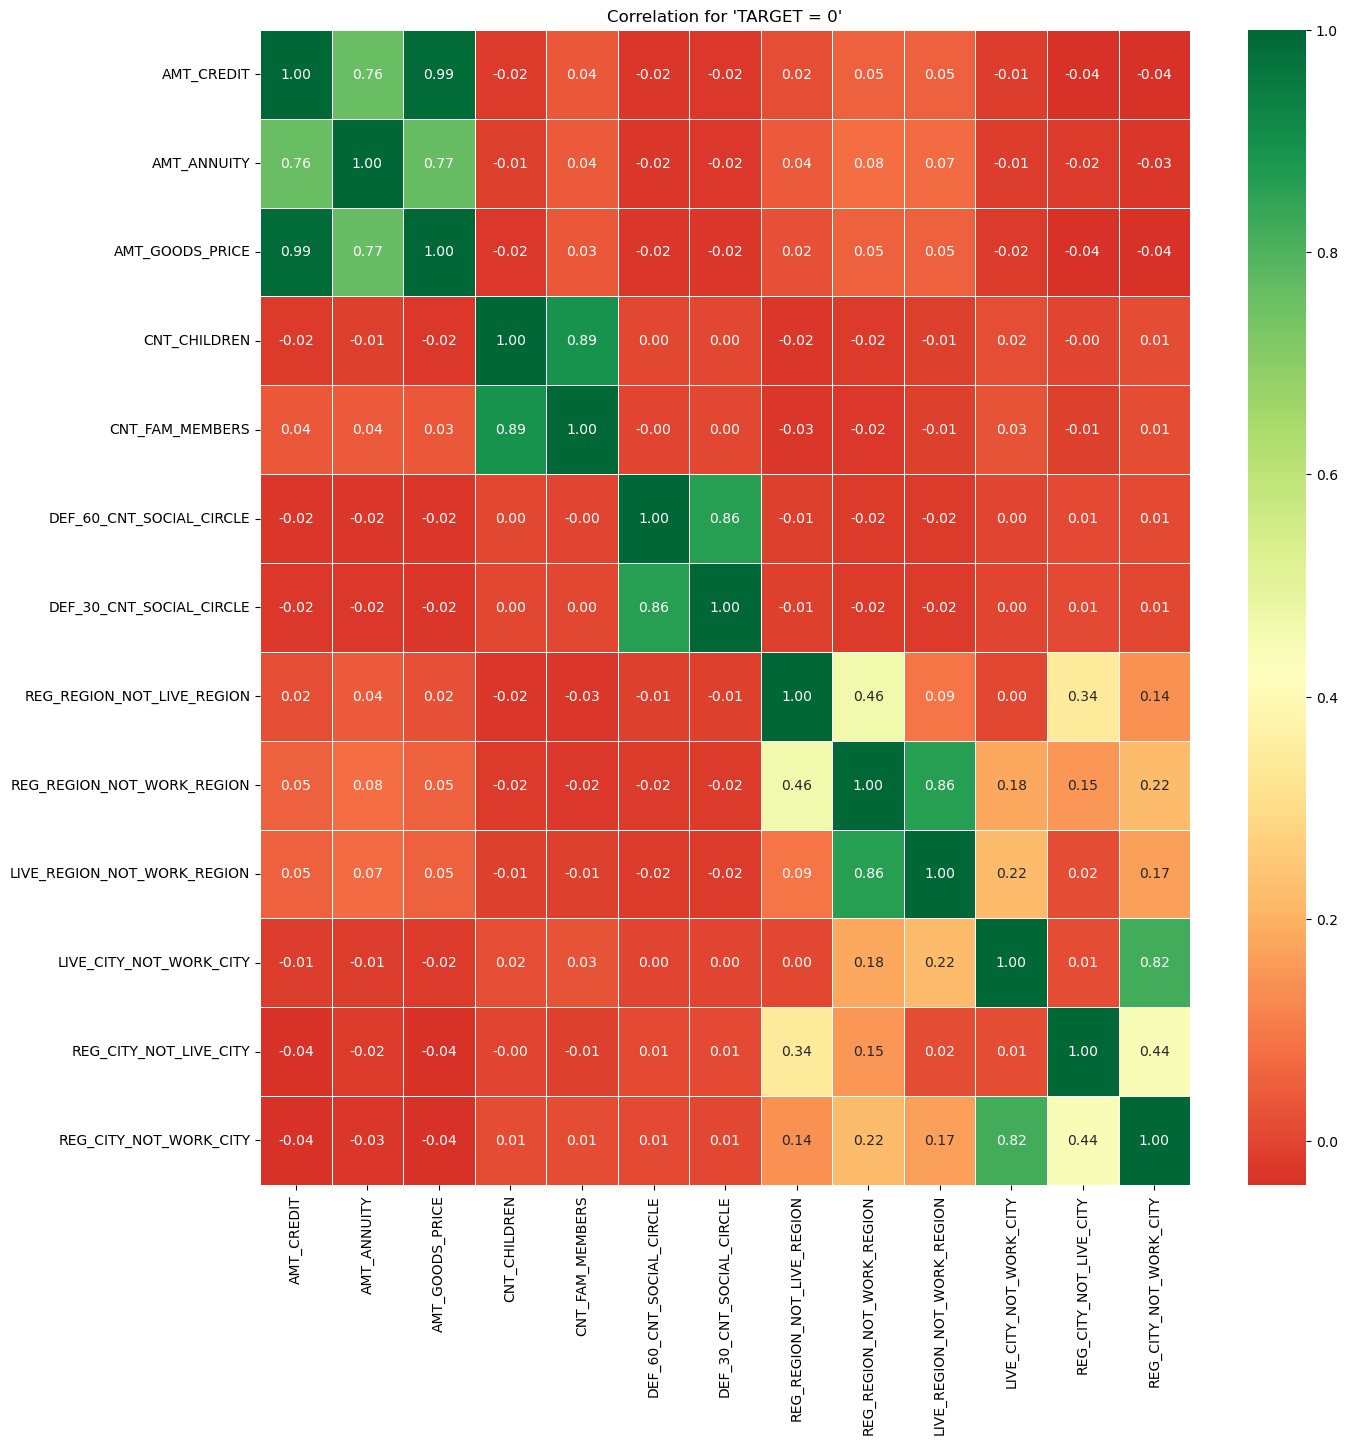

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr_target_0.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, center = 0.421)
plt.title("Correlation for 'TARGET = 0'")
plt.show()

###### Top 10 Correlations for Target 0 (Non-Defaulter):
- AMT_ CREDIT and AMT_GOODS_PRICE has a positive correlation of 0.986471
- CNT_CHILDREN and CNT_FAM_MEMBERS has a positive correlation of 0.893275
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE has a positive correlation of 0.861492
- LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of 0.860421
- REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY has a positive correlation of 0.820828
- AMT_GOODS_PRICE and AMT_ ANNUITY has a positive correlation of 0.766669 
- AMT_CREDIT and AMT_ANNUITY has a positive correlation of 0.762117
- REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of has a positive correlation of 0.461596
- REG_CITY_NOT_LIVE_CITY and REG_CITY_NOT_WORK_CITY has a positive correlation of 0.442640
- REG_REGION_NOT_LIVE_REGION and REG_CITY_NOT_LIVE_CITY has a positive correlation of 0.342321

# EDA Methodologies For Table2 (previous_application.csv)

## 1. Reading & Analysing Dataframes

In [100]:
# #reading the data set of previous_application.csv
df2 = pd.read_csv('C:/Users/A/Downloads/upgrad/credit EDA assignment/previous_application.csv')
df2.shape

(1670214, 37)

In [101]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## 2. Data cleaning

In [102]:
# checking the null values in percentages rounding to 2 decimal points
round(100*df2.isnull().mean().sort_values(ascending=False),2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

### Dropping columns having missing values > 40%

In [103]:
# List of columns have missing values > 40%
cols_to_drop2=list(df2.columns[100*df2.isnull().mean()>40])
print(cols_to_drop2, len(cols_to_drop2))

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'] 11


In [104]:
# dropping 11 columns
df2.drop(cols_to_drop2,axis=1,inplace=True)
df2.shape

(1670214, 26)

### Droping Unwanted columns

In [105]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [106]:
unwanted2 = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [107]:
# Delete the columns which are irrelevant for the analysis
df2 = df2.drop(unwanted2,axis=1)
df2.shape

(1670214, 22)

### Droping Unwanted Rows

In [108]:
# Count the number of rows having more than 60% missing values
len(df2[df2.isnull().sum(axis=1) > (len(df2.columns)//2)].index)

0

- since, there are 0  rows having missing values > 60% hence we will not drop any rows.

### Checking Remaining columns having missing values < 40% to treat (if required)

In [109]:
# checking the null values in percentages rounding to 2 decimal points
round(100*df2.isnull().mean().sort_values(ascending=False),2)

AMT_GOODS_PRICE           23.08
AMT_ANNUITY               22.29
CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
AMT_CREDIT                 0.00
NAME_GOODS_CATEGORY        0.00
NAME_YIELD_GROUP           0.00
NAME_SELLER_INDUSTRY       0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_PRODUCT_TYPE          0.00
NAME_PORTFOLIO             0.00
SK_ID_PREV                 0.00
NAME_CLIENT_TYPE           0.00
SK_ID_CURR                 0.00
NAME_PAYMENT_TYPE          0.00
DAYS_DECISION              0.00
NAME_CONTRACT_STATUS       0.00
NAME_CASH_LOAN_PURPOSE     0.00
AMT_APPLICATION            0.00
NAME_CONTRACT_TYPE         0.00
CODE_REJECT_REASON         0.00
dtype: float64

In [110]:
cols_to_modify2=list(df2.columns[(100*df2.isnull().mean()<=40) & (100*df2.isnull().mean()>0)])
print(cols_to_modify2, len(cols_to_modify2))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION'] 5


In [111]:
for i in cols_to_modify2:
    print(i,df2[i].dtype)

AMT_ANNUITY float64
AMT_CREDIT float64
AMT_GOODS_PRICE float64
CNT_PAYMENT float64
PRODUCT_COMBINATION object


#### Missing Value Strategy:
 - (a) For numerical/continuous we can use mean or median. But, median is preferred as it is unaffected by extreme values.
 - (b) For categorical/discrete columns we can use mode for imputing the missing values.

In [112]:
# using loop to treat all the numeric column's missing values with the median value.
num_cols_for_missing_values2 = ['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']
for i in num_cols_for_missing_values2:
    med=df2[i].median()
    df2[i]=df2[i].fillna(med)

In [113]:
df2.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [114]:
df2.PRODUCT_COMBINATION.isnull().sum()

346

In [115]:
# treating the missing values for the column "PRODUCT_COMBINATION" with the mode value.
df2['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)

In [116]:
# checking the null values in percentages rounding to 2 decimal points
round(100*df2.isnull().mean().sort_values(ascending=False),2)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NAME_YIELD_GROUP          0.0
CNT_PAYMENT               0.0
NAME_SELLER_INDUSTRY      0.0
SELLERPLACE_AREA          0.0
CHANNEL_TYPE              0.0
NAME_PRODUCT_TYPE         0.0
NAME_PORTFOLIO            0.0
NAME_GOODS_CATEGORY       0.0
NAME_CLIENT_TYPE          0.0
CODE_REJECT_REASON        0.0
NAME_PAYMENT_TYPE         0.0
DAYS_DECISION             0.0
NAME_CONTRACT_STATUS      0.0
NAME_CASH_LOAN_PURPOSE    0.0
AMT_GOODS_PRICE           0.0
AMT_CREDIT                0.0
AMT_APPLICATION           0.0
AMT_ANNUITY               0.0
NAME_CONTRACT_TYPE        0.0
PRODUCT_COMBINATION       0.0
dtype: float64

### Checking if any 'blanks'/'XNA'/'XAP' are present as missing values.

In [117]:
# identifying all the Categorical columns in the dataframe Previous_application.csv
obj_col_list2 = df2.select_dtypes(exclude=['float64','int64']).columns
print(obj_col_list2, len(obj_col_list2))

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object') 13


In [118]:
df2.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [119]:
df2.NAME_CONTRACT_TYPE.mode()[0]

'Cash loans'

In [120]:
df2.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [121]:
df2.NAME_CASH_LOAN_PURPOSE.mode()[0]

'XAP'

In [122]:
df2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize =True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [123]:
df2.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [124]:
df2.NAME_PAYMENT_TYPE.unique()

array(['Cash through the bank', 'XNA', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [125]:
df2.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [126]:
df2.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [127]:
df2.NAME_GOODS_CATEGORY.unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [128]:
df2.NAME_PORTFOLIO.unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [129]:
df2.NAME_PRODUCT_TYPE.unique()

array(['XNA', 'x-sell', 'walk-in'], dtype=object)

In [130]:
df2.CHANNEL_TYPE.unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [131]:
df2.NAME_SELLER_INDUSTRY.unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [132]:
df2.NAME_YIELD_GROUP.unique()

array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

In [133]:
df2.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest'], dtype=object)

- column like NAME_CASH_LOAN_PURPOSE has 50% XAP values and 40% XNA values. This looks like these values entered in the application as blank or may be not applicable.
- Replacing all the XNA and XAP to np.null as replacing these with any mode value can bias the analysis.

In [134]:
df2.replace('XNA',np.nan,inplace=True)
df2.replace('XAP',np.nan,inplace=True)

In [135]:
# checking the null values in percentages rounding to 2 decimal points
round(100*df2.isnull().mean().sort_values(ascending=False),2)

NAME_CASH_LOAN_PURPOSE    95.83
CODE_REJECT_REASON        81.33
NAME_PRODUCT_TYPE         63.68
NAME_GOODS_CATEGORY       56.93
NAME_SELLER_INDUSTRY      51.23
NAME_PAYMENT_TYPE         37.56
NAME_YIELD_GROUP          30.97
NAME_PORTFOLIO            22.29
NAME_CLIENT_TYPE           0.12
NAME_CONTRACT_TYPE         0.02
CNT_PAYMENT                0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
DAYS_DECISION              0.00
NAME_CONTRACT_STATUS       0.00
AMT_GOODS_PRICE            0.00
AMT_CREDIT                 0.00
AMT_APPLICATION            0.00
AMT_ANNUITY                0.00
PRODUCT_COMBINATION        0.00
dtype: float64

In [136]:
# List of columns have missing values > 30%
cols_to_drop3=list(df2.columns[100*df2.isnull().mean()>30])
print(cols_to_drop3, len(cols_to_drop3))

['NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'] 7


In [137]:
# dropping 7 columns
df2.drop(cols_to_drop3,axis=1,inplace=True)
df2.shape

(1670214, 15)

In [138]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

### Converting DAYS_DECISION column into YEARS_DECISION column for better readablity and analysis

In [139]:
# Divide 'DAYS_DECISION' by 365 for taking YEARS_DECISION
df2['YEARS_DECISION'] = abs(df2['DAYS_DECISION']//365)
df2.drop('DAYS_DECISION',axis=1,inplace=True)

In [140]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0     17145.0          17145.0             Approved         Repeater   
1    679671.0         607500.0             Approved         Repeater   
2    136444.5         112500.0             Approved         Repeater   
3    470790.0         450000.0             Approved         Repeater   
4    404055.0         337500.0              Refused         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0            POS             Country-wide                35         12.0   
1           Cash           Contact center                -1         36.0   
2           Cash  Credit and cash offices                -1         12.0   
3           Cash  Credit and cash offices                -1         12.0   
4           Cash  Credit and cash offices                -1         24.0   

        PRODUCT_COMBINATION  YEARS_DECISION  
0  POS mobile with interest               1  
1          Cash X-Sell: low               1  
2         Cash X-Sell: high               1  
3       Cash X-Sell: middle               2  
4         Cash Street: high               3

### Converting Negative values to its Absolute Value in SELLERPLACE_AREA column:

In [141]:
df2.SELLERPLACE_AREA = df2.SELLERPLACE_AREA.abs()

In [142]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0     17145.0          17145.0             Approved         Repeater   
1    679671.0         607500.0             Approved         Repeater   
2    136444.5         112500.0             Approved         Repeater   
3    470790.0         450000.0             Approved         Repeater   
4    404055.0         337500.0              Refused         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0            POS             Country-wide                35         12.0   
1           Cash           Contact center                 1         36.0   
2           Cash  Credit and cash offices                 1         12.0   
3           Cash  Credit and cash offices                 1         12.0   
4           Cash  Credit and cash offices                 1         24.0   

        PRODUCT_COMBINATION  YEARS_DECISION  
0  POS mobile with interest               1  
1          Cash X-Sell: low               1  
2         Cash X-Sell: high               1  
3       Cash X-Sell: middle               2  
4         Cash Street: high               3

## 3. Identifying Outliers (using Scatterplot)

In [143]:
# identifying all the numeric columns in the dataframe application_data.csv
num_col_list2 = df2.select_dtypes(exclude=['object']).columns
print(num_col_list2, len(num_col_list2))

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'YEARS_DECISION'],
      dtype='object') 9


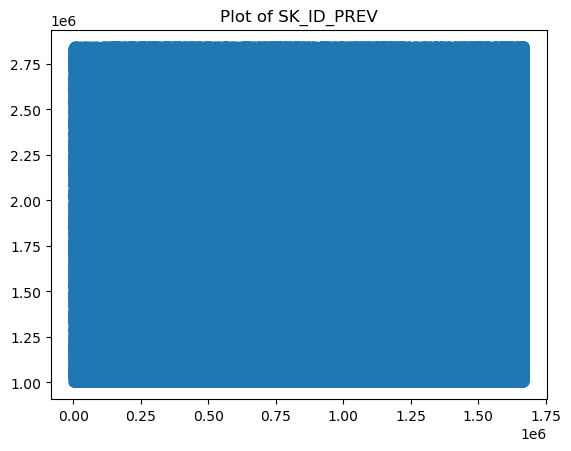

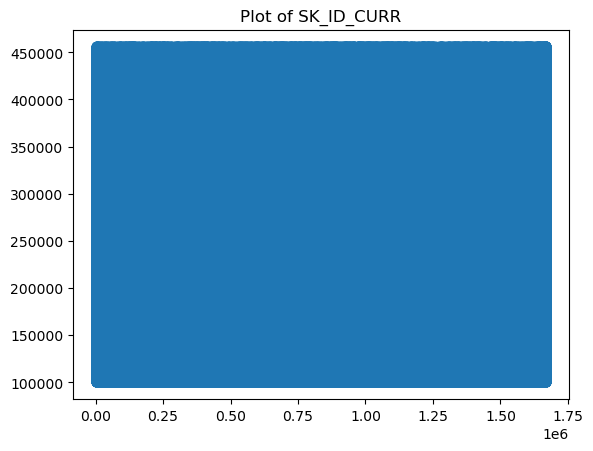

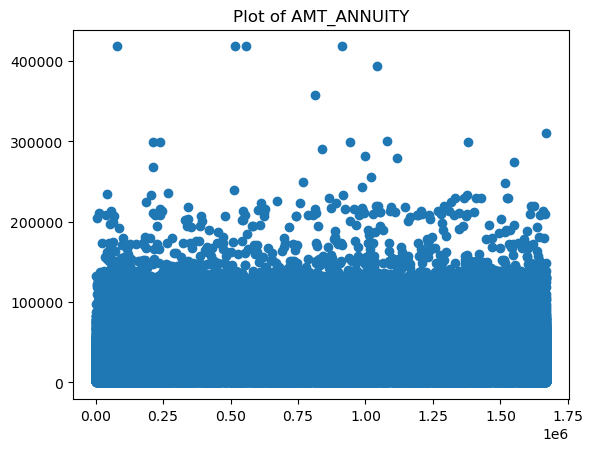

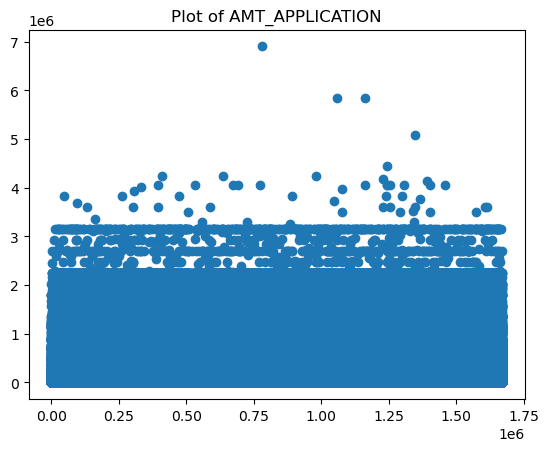

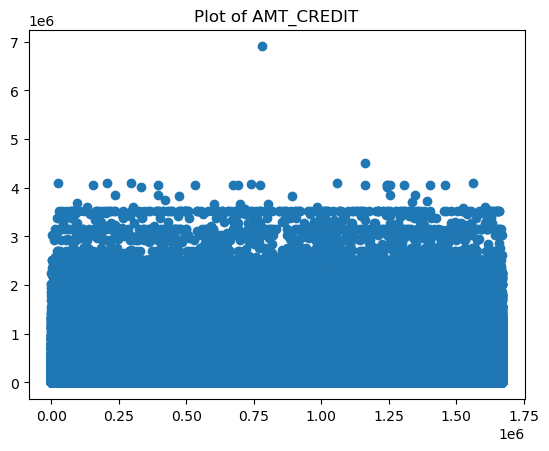

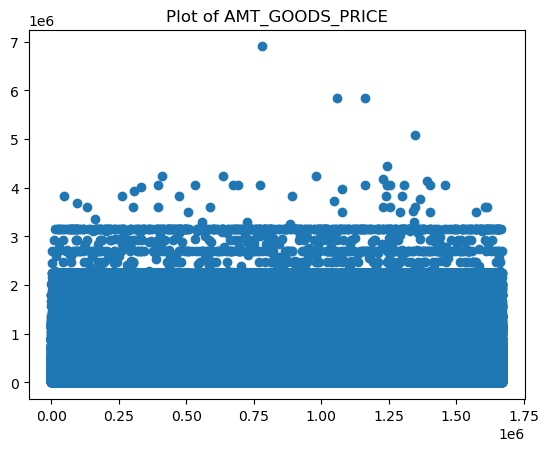

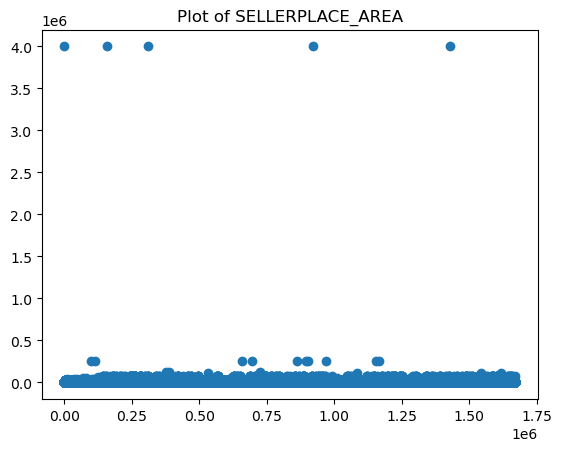

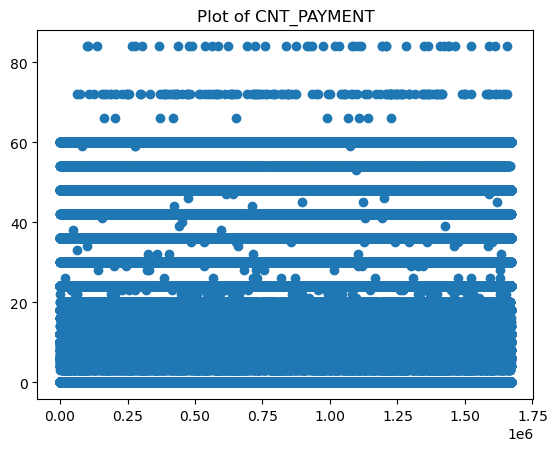

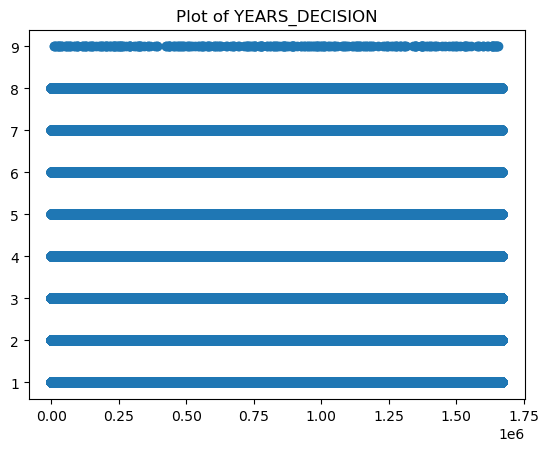

In [144]:
for column in num_col_list2:
    title = "Plot of "+column
    plt.scatter(df2.index, df2[column])
    plt.title(title)
    plt.show()

### Analysis the Significant Outliers (Using Boxplot):

##### Out of 10 numeric columns we see significant outliers in these following columns 
('AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA')

In [145]:
# Box plotting for outlier analysis in logarithmic scale

def outlier_boxplot(data,col,title):
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =df2, y=col)
    plt.show()

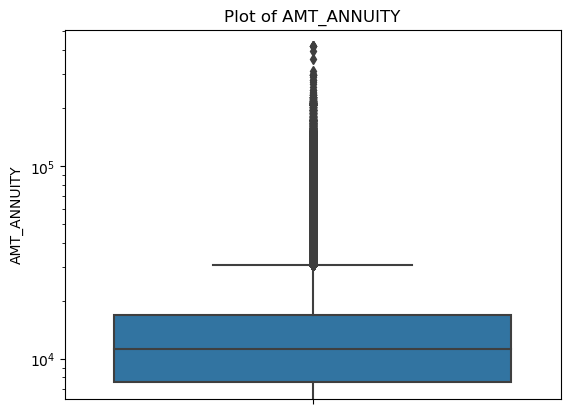

In [146]:
outlier_boxplot(data=df2,col='AMT_ANNUITY',title='Plot of AMT_ANNUITY')

##### Inferences:
- Some of outliers are noticed in AMT_ANNUITY column.
- This indicates that annuity clients are borrowing large amount

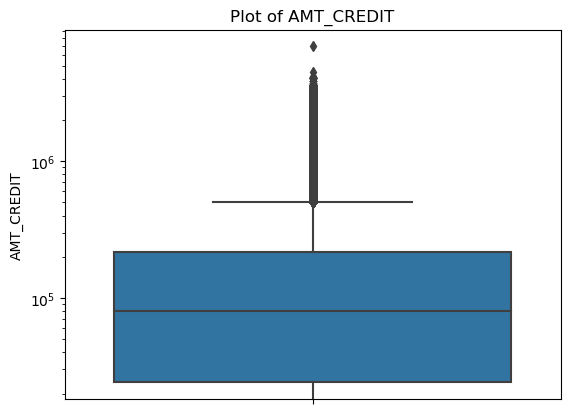

In [147]:
outlier_boxplot(data=df2,col='AMT_CREDIT',title='Plot of AMT_CREDIT')

##### Inferences:
- Some of outliers are noticed in AMT_CREDIT column.
- This indicates that some clients received more creddit amount than the amount they applier for.
- The first quartile is bigger than third quartile for credit amount which means most of the clients are from first quartile

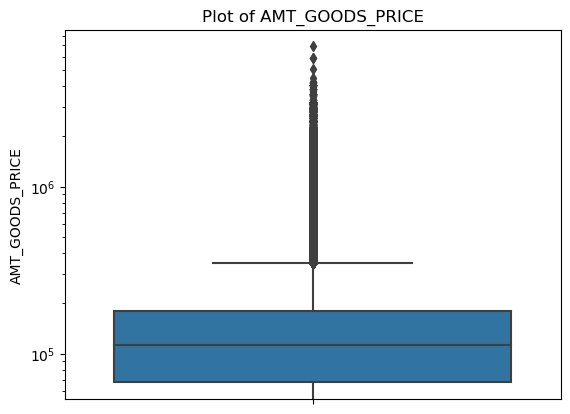

In [148]:
outlier_boxplot(data=df2,col='AMT_GOODS_PRICE',title='Plot of AMT_GOODS_PRICE')

#### Inferences:
- Some of outliers are noticed in AMT_CREDIT column.
- This indicates that some clients has demanded for higher goods price.

# Merging Table-1 (Current application) and Table-2 (Previous application dataset)

## 1. Reaing & Analysing Data

In [149]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBL

In [150]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','CNT_CHILDREN',
                'AGE_CATEGORICAL','AMT_INCOME_RANGE','NAME_INCOME_TYPE','YEARS_EMPLOYED_CATEGORICAL','NAME_TYPE_SUITE', 
                'OCCUPATION_TYPE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY','YEARS_EMPLOYED']

In [151]:
# Creating a dataset from current application for merging 
df_current = df1[cols_current]
df_current.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS  CNT_FAM_MEMBERS  CNT_CHILDREN     AGE_CATEGORICAL  \
0  Single / not married              1.0             0        Young Adults   
1               Married              2.0             0  Middle-aged Adults   
2  Single / not married              1.0             0     Senior Citizens   
3        Civil marriage              2.0             0     Senior Citizens   
4  Single / not married              1.0             0     Senior Citizens   

  AMT_INCOME_RANGE NAME_INCOME_TYPE YEARS_EMPLOYED_CATEGORICAL  \
0    200000-225000          Working                  0-5 years   
1    250000-275000    State servant                  0-5 years   
2      50000-75000          Working                        NaN   
3    125000-150000          Working                 5-10 years   
4    100000-125000          Working                 5-10 years   

  NAME_TYPE_SUITE OCCUPATION_TYPE  DEF_60_CNT_SOCIAL_CIRCLE  \
0   Unaccompanied        Laborers                       2.0   
1          Family      Core staff                       0.0   
2   Unaccompanied        Laborers                       0.0   
3   Unaccompanied        Laborers                       0.0   
4   Unaccompanied      Core staff                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  REG_REGION_NOT_LIVE_REGION  \
0                       2.0                           0   
1                       0.0                           0   
2                       0.0                           0   
3                       0.0                           0   
4                       0.0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        1                       0                       1   

   YEARS_EMPLOYED  
0               1  
1               3  
2               0  
3               8  
4               8

In [152]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'YEARS_DECISION'],
      dtype='object')

In [153]:
merged_df=pd.merge(left=df_current,right=df2,how='inner',on='SK_ID_CURR')

In [154]:
merged_df.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100003       0           F               Higher education   
3      100003       0           F               Higher education   
4      100004       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS  CNT_FAM_MEMBERS  CNT_CHILDREN     AGE_CATEGORICAL  \
0  Single / not married              1.0             0        Young Adults   
1               Married              2.0             0  Middle-aged Adults   
2               Married              2.0             0  Middle-aged Adults   
3               Married              2.0             0  Middle-aged Adults   
4  Single / not married              1.0             0     Senior Citizens   

  AMT_INCOME_RANGE NAME_INCOME_TYPE YEARS_EMPLOYED_CATEGORICAL  \
0    200000-225000          Working                  0-5 years   
1    250000-275000    State servant                  0-5 years   
2    250000-275000    State servant                  0-5 years   
3    250000-275000    State servant                  0-5 years   
4      50000-75000          Working                        NaN   

  NAME_TYPE_SUITE OCCUPATION_TYPE  DEF_60_CNT_SOCIAL_CIRCLE  \
0   Unaccompanied        Laborers                       2.0   
1          Family      Core staff                       0.0   
2          Family      Core staff                       0.0   
3          Family      Core staff                       0.0   
4   Unaccompanied        Laborers                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  REG_REGION_NOT_LIVE_REGION  \
0                       2.0                           0   
1                       0.0                           0   
2                       0.0                           0   
3                       0.0                           0   
4                       0.0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   

   YEARS_EMPLOYED  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0               1     1038818     Consumer loans     9251.775   
1               3     1810518         Cash loans    98356.995   
2               3     2636178     Consumer loans    64567.665   
3               3     2396755     Consumer loans     6737.310   
4               0     1564014     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  \
0         179055.0    179055.0         179055.0             Approved   
1         900000.0   1035882.0         900000.0             Approved   
2         337500.0    348637.5         337500.0             Approved   
3          68809.5     68053.5          68809.5             Approved   
4          24282.0     20106.0          24282.0             Approved   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
0              New            POS                    Stone               500   
1         Repeater           Cash  Credit and cash offices                 1   
2        Refreshed            POS                    Stone              1400   
3       

In [155]:
merged_df.shape

(1140118, 36)

## 2. Data Cleaning

In [156]:
# checking the null values in percentages rounding to 2 decimal points
round(100*merged_df.isnull().mean().sort_values(ascending=False),2)

NAME_PORTFOLIO                 21.38
YEARS_EMPLOYED_CATEGORICAL     10.43
NAME_CLIENT_TYPE                0.11
NAME_CONTRACT_TYPE              0.03
SK_ID_CURR                      0.00
YEARS_EMPLOYED                  0.00
SK_ID_PREV                      0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                 0.00
REG_CITY_NOT_LIVE_CITY          0.00
NAME_CONTRACT_STATUS            0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
CNT_PAYMENT                     0.00
PRODUCT_COMBINATION             0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
TARGET                          0.00
AMT_INCOME_RANGE                0.00
CODE_GENDER                     0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
CNT_FAM_MEMBERS                 0.00
CNT_CHILDREN                    0.00
AGE_CATEGORICAL                 0.00
N

In [157]:
merged_df.NAME_CLIENT_TYPE.value_counts()

Repeater     829614
New          215053
Refreshed     94241
Name: NAME_CLIENT_TYPE, dtype: int64

In [158]:
merged_df.NAME_CLIENT_TYPE.isnull().sum()

1210

In [159]:
# treating the missing values for the column "NAME_CLIENT_TYPE" with the mode value.
merged_df['NAME_CLIENT_TYPE'].fillna('Repeater', inplace=True)

In [160]:
merged_df.NAME_CLIENT_TYPE.isnull().sum()

0

In [161]:
merged_df.NAME_CONTRACT_TYPE.value_counts()

Consumer loans     527248
Cash loans         474225
Revolving loans    138352
Name: NAME_CONTRACT_TYPE, dtype: int64

In [162]:
merged_df.NAME_CONTRACT_TYPE.isnull().sum()

293

In [163]:
# treating the missing values for the column "NAME_CLIENT_TYPE" with the mode value.
merged_df['NAME_CONTRACT_TYPE'].fillna('Consumer loans', inplace=True)

In [164]:
merged_df.NAME_CONTRACT_TYPE.isnull().sum()

0

#### Since it has a huge dataset. and we have treate all the missing values < 10% so now, we remain only with missing values > 10%. Hence, if we drop those missing values from the merged_df >10% then it wont affect our analysis.

In [165]:
merged_df.isnull().sum().sort_values(ascending=False)

NAME_PORTFOLIO                 243719
YEARS_EMPLOYED_CATEGORICAL     118870
SK_ID_CURR                          0
YEARS_EMPLOYED                      0
SK_ID_PREV                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
REG_CITY_NOT_LIVE_CITY              0
NAME_CONTRACT_STATUS                0
NAME_CLIENT_TYPE                    0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
CNT_PAYMENT                         0
PRODUCT_COMBINATION                 0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
TARGET                              0
AMT_INCOME_RANGE                    0
CODE_GENDER                         0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
CNT_FAM_MEMBERS                     0
CNT_CHILDREN                        0
AGE_CATEGORI

In [166]:
# ropping missing values from merged_df
merged_df.dropna(inplace=True)

In [167]:
merged_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
CNT_FAM_MEMBERS                0
CNT_CHILDREN                   0
AGE_CATEGORICAL                0
AMT_INCOME_RANGE               0
NAME_INCOME_TYPE               0
YEARS_EMPLOYED_CATEGORICAL     0
NAME_TYPE_SUITE                0
OCCUPATION_TYPE                0
DEF_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
LIVE_CITY_NOT_WORK_CITY        0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
YEARS_EMPLOYED                 0
SK_ID_PREV                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_CONTRACT_STATUS           0
NAME_CLIENT_TYPE               0
NAME_PORTF

## 3.  Analysis wrt Target Variable.

### Analysis on Categorical Variable

In [197]:
# Count plotting in logarithmic scale
def countplot(col1,title,col2):
    
    temp = pd.Series(data = col2)
    fig, ax = plt.subplots()
    width = len(merged_df[col1].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = merged_df, x= col1, order=merged_df[col1].value_counts().index,hue = col2,palette='Greens') 
        
    plt.show()

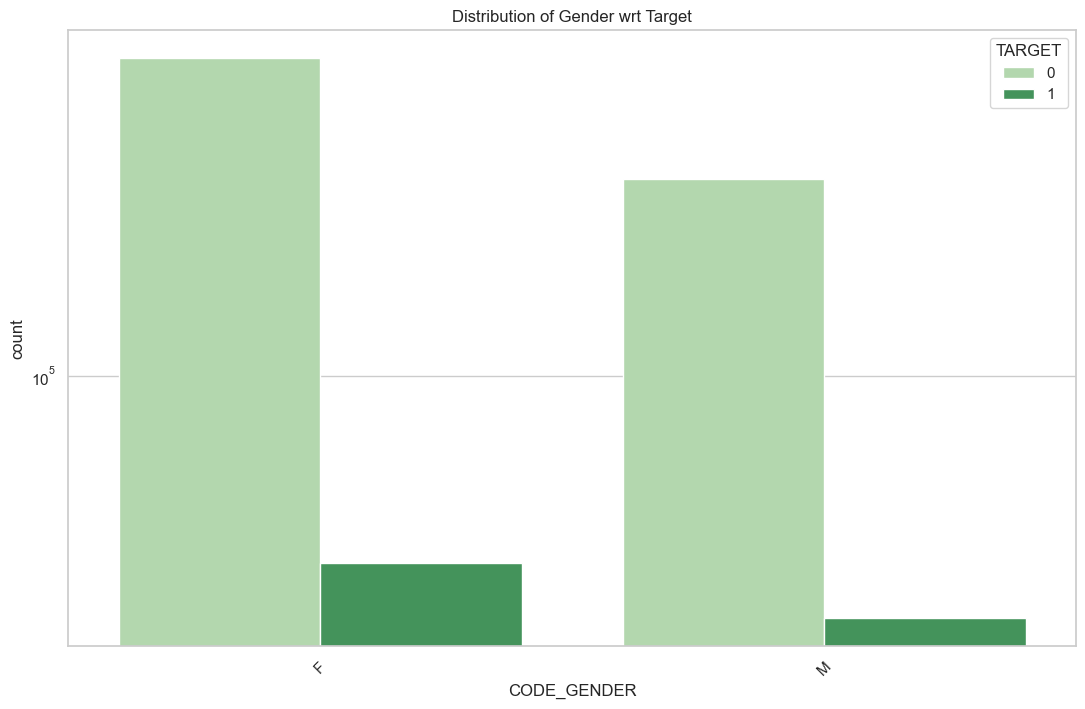

In [198]:
# PLotting for CODE_GENDER
countplot(col1='CODE_GENDER',title='Distribution of Gender wrt Target',col2='TARGET')

###### Inferences:
- It is observed that, males are less defaulter than females.
- Count of females are more than males

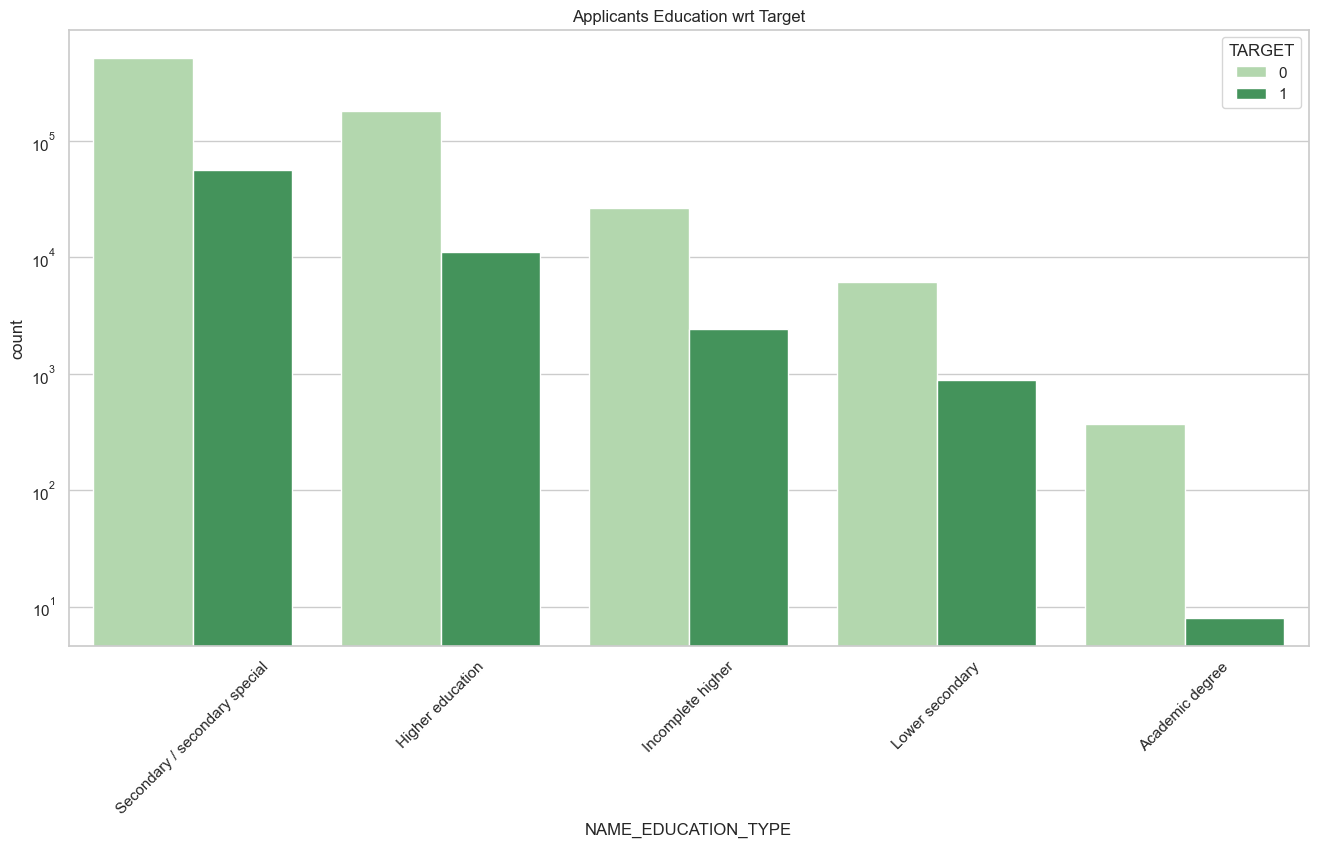

In [199]:
# PLotting for NAME_EDUCATION_TYPE
countplot(col1='NAME_EDUCATION_TYPE',title='Applicants Education wrt Target',col2='TARGET')

###### Inferences:
- It is observed that applicants having education type ‘secondary/secondary special’ are more likely to be defaulters than the non-defaulters.
- Applicants having education type ‘Higher Education’ are more likely to be Non-defaulters than the defaulters.
- Applicants with lower education level tends to take less loan.


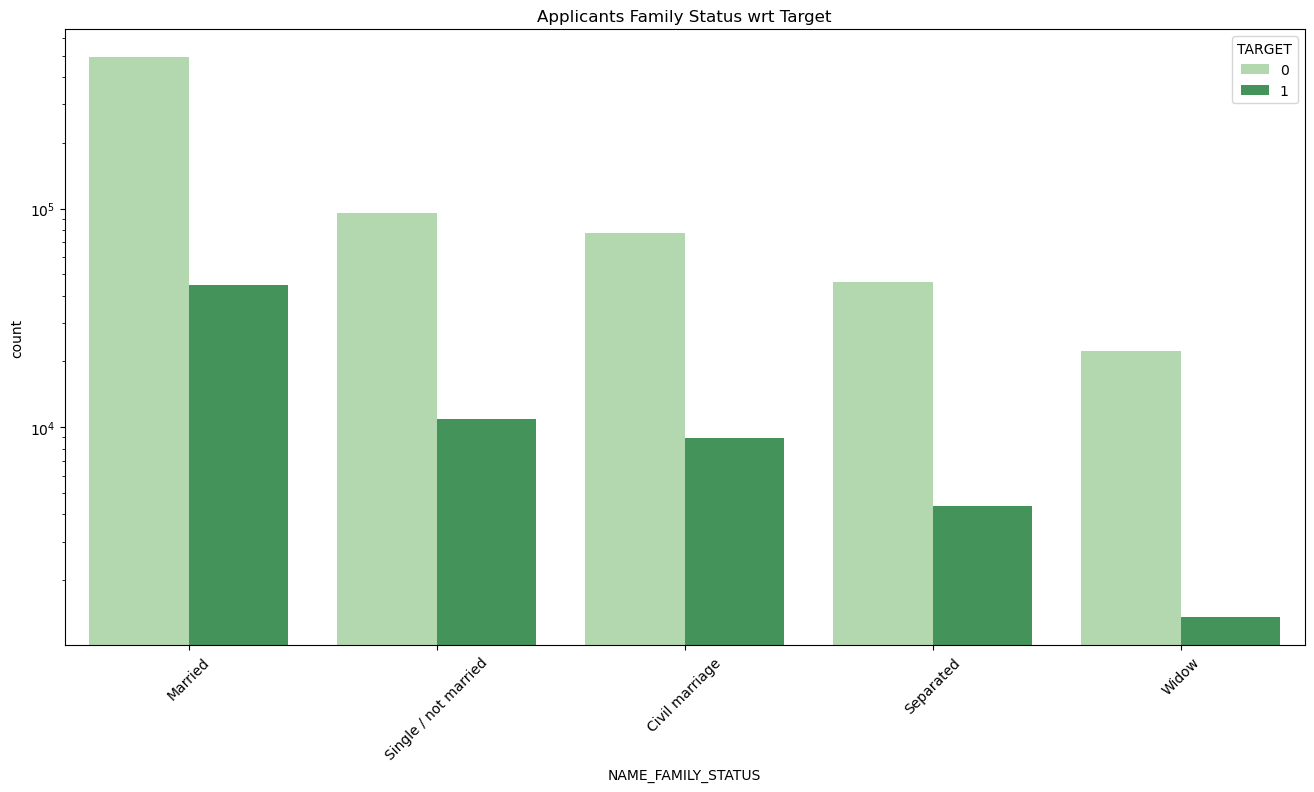

In [171]:
# PLotting for NAME_FAMILY_STATUS
countplot(col1='NAME_FAMILY_STATUS',title='Applicants Family Status wrt Target',col2='TARGET')

###### Inferences:
- widows are the least defaulter.
- married are the most defaulter.

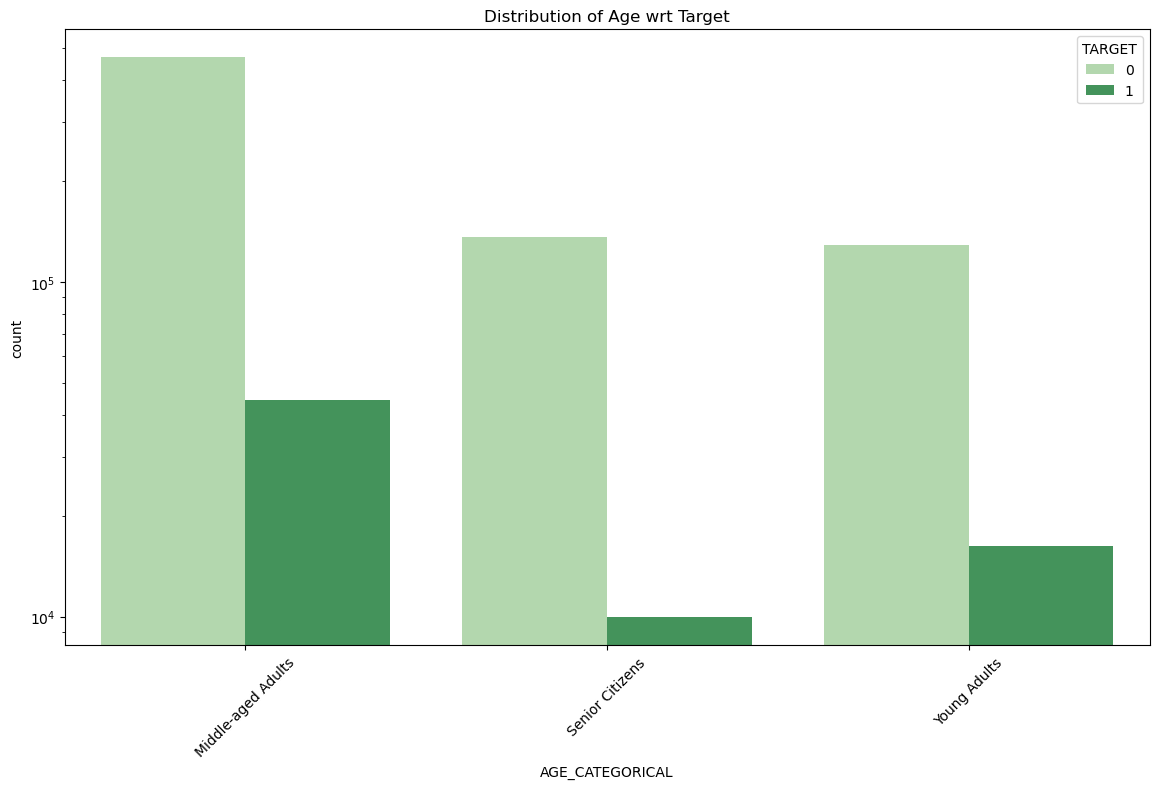

In [172]:
# PLotting for AGE_CATEGORICAL
countplot(col1='AGE_CATEGORICAL',title='Distribution of Age wrt Target',col2='TARGET')

###### Inferences:
- Senior Citizens are the least defaulters
- Middle aged adults are the most defaulters.

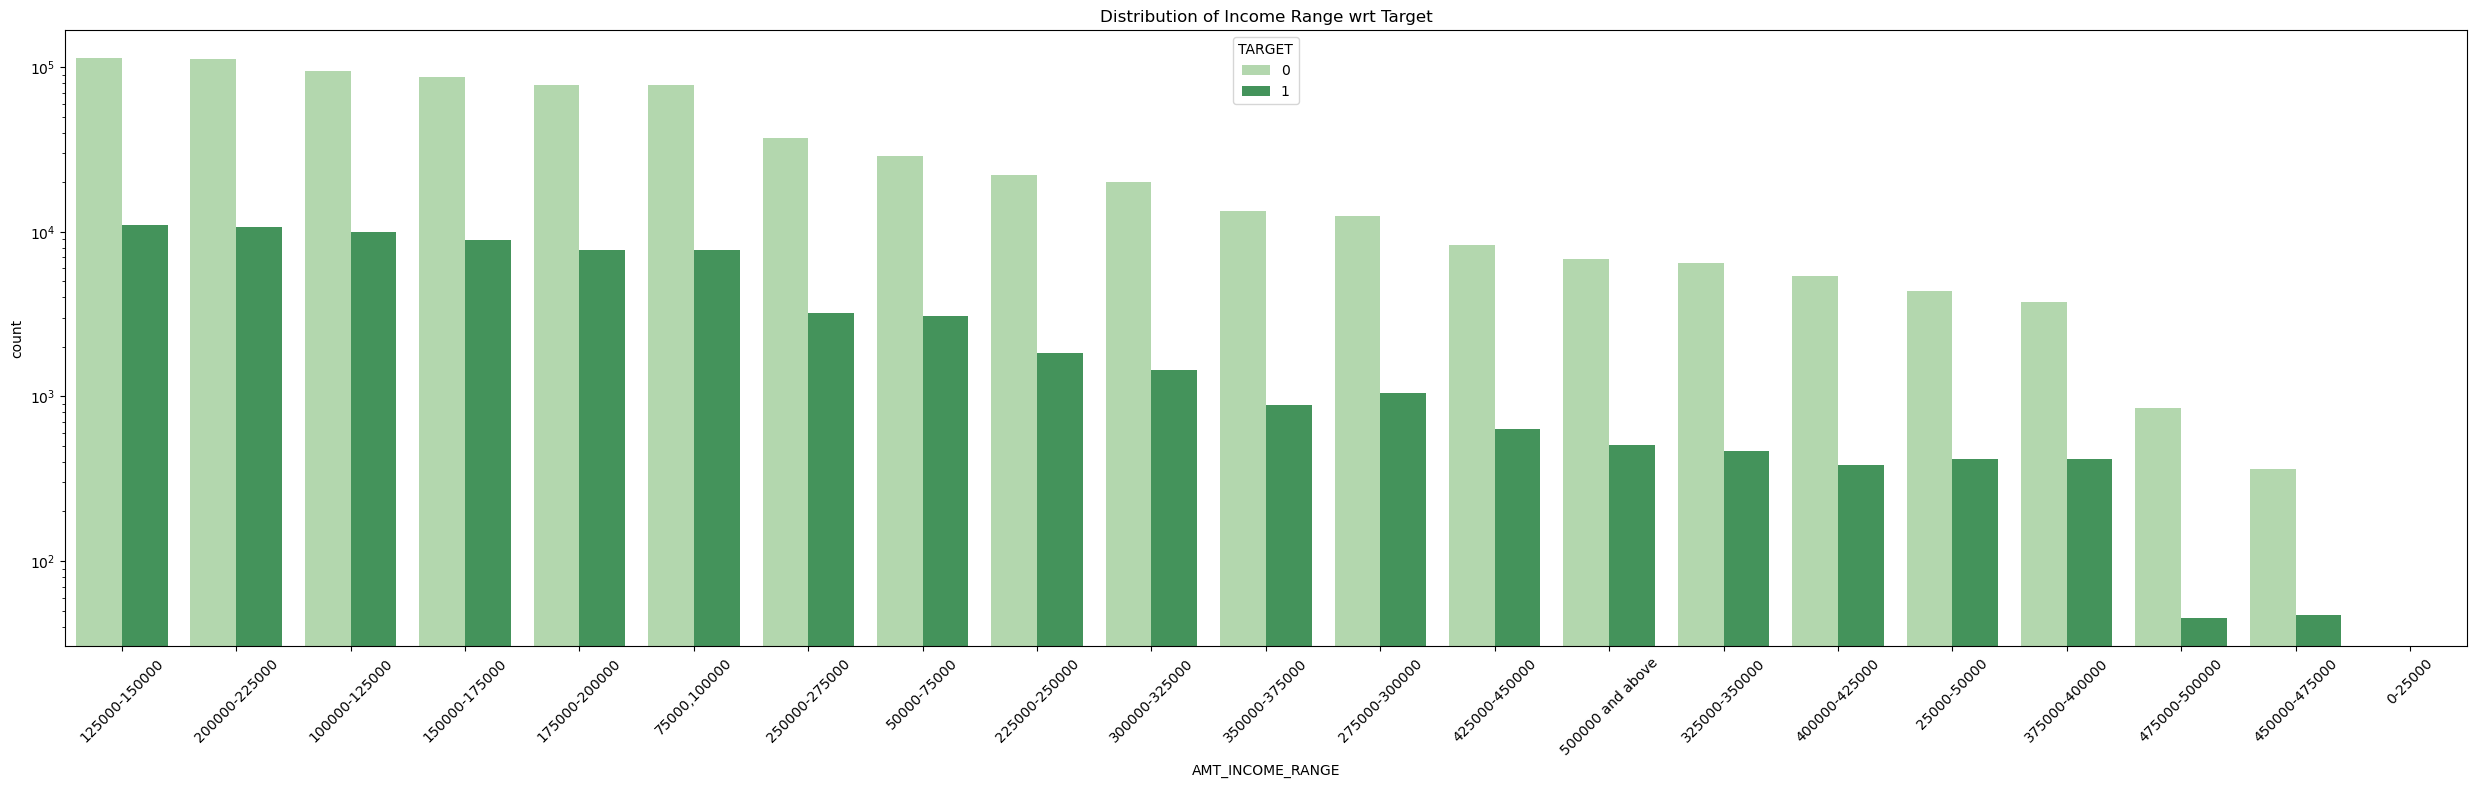

In [173]:
# PLotting for AMT_INCOME_RANGE
countplot(col1='AMT_INCOME_RANGE',title='Distribution of Income Range wrt Target',col2='TARGET')

###### Inferences:
- Applicants with higher income range tends to be less defaulter than lower income range.

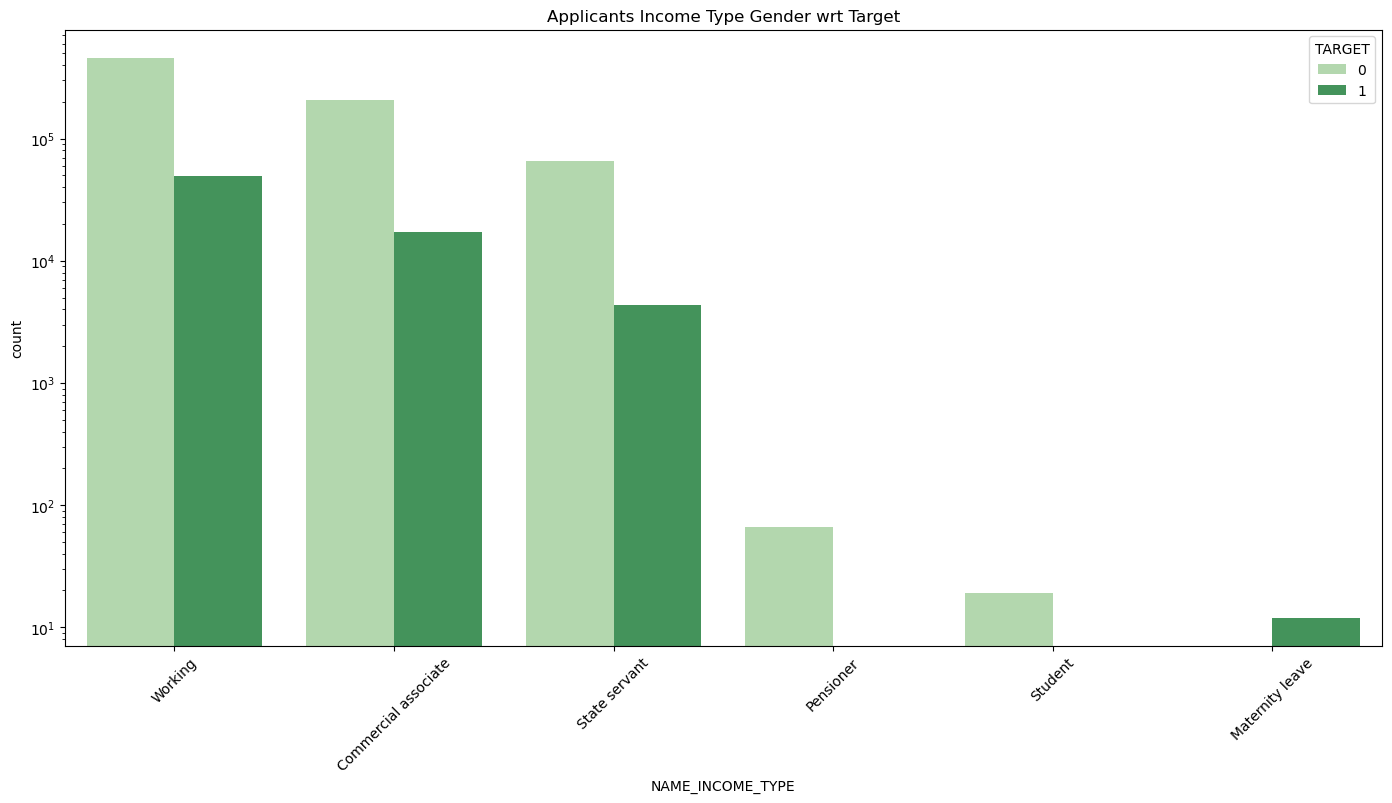

In [174]:
# PLotting for NAME_INCOME_TYPE
countplot(col1='NAME_INCOME_TYPE',title='Applicants Income Type wrt Target',col2='TARGET')

###### Inferences:
- Working proffessional are the most defaulters followed by Commercial associate and state servants.
- students, pensioner are the least defaulters followed by Maternity leave.

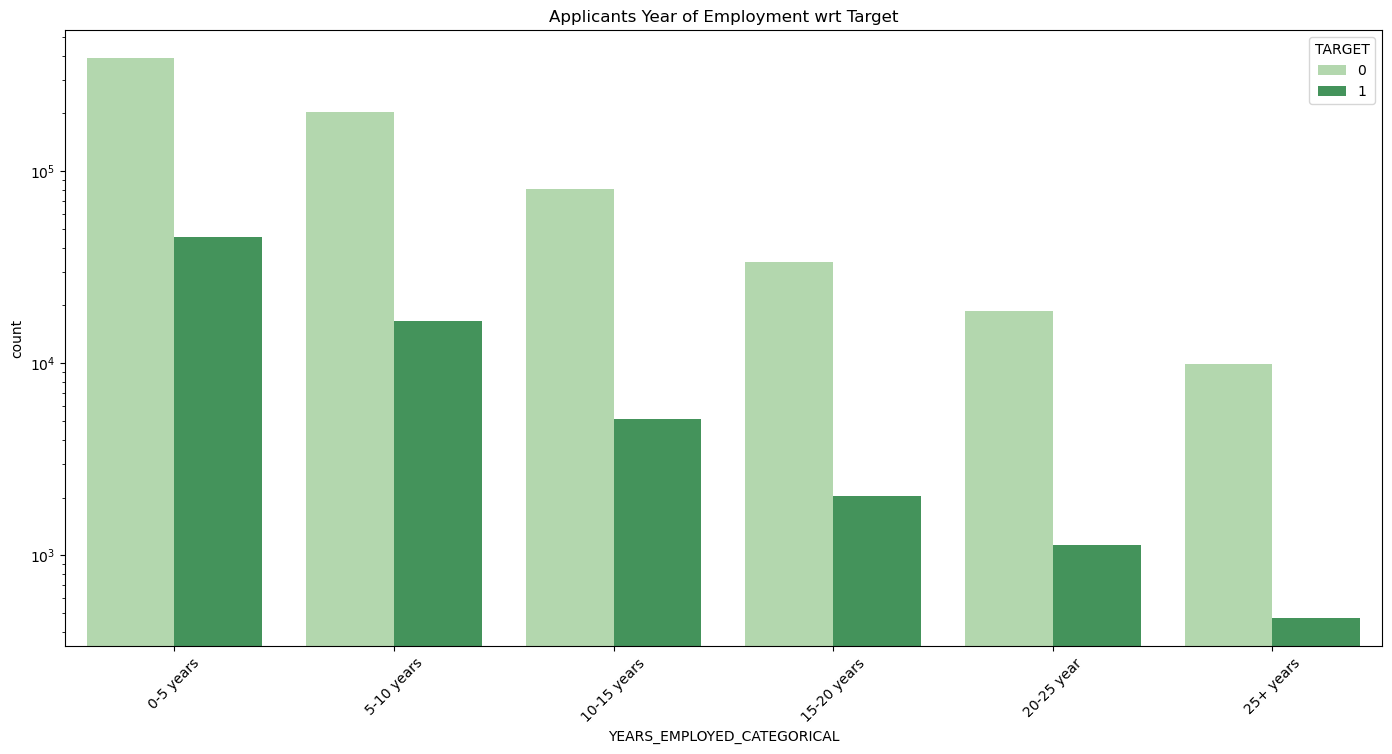

In [175]:
# PLotting for YEARS_EMPLOYED_CATEGORICAL
countplot(col1='YEARS_EMPLOYED_CATEGORICAL',title='Applicants Year of Employment wrt Target',col2='TARGET')

###### Inferences:
- Applicants with more years of employment tends to be less defaulter than with less years of employment

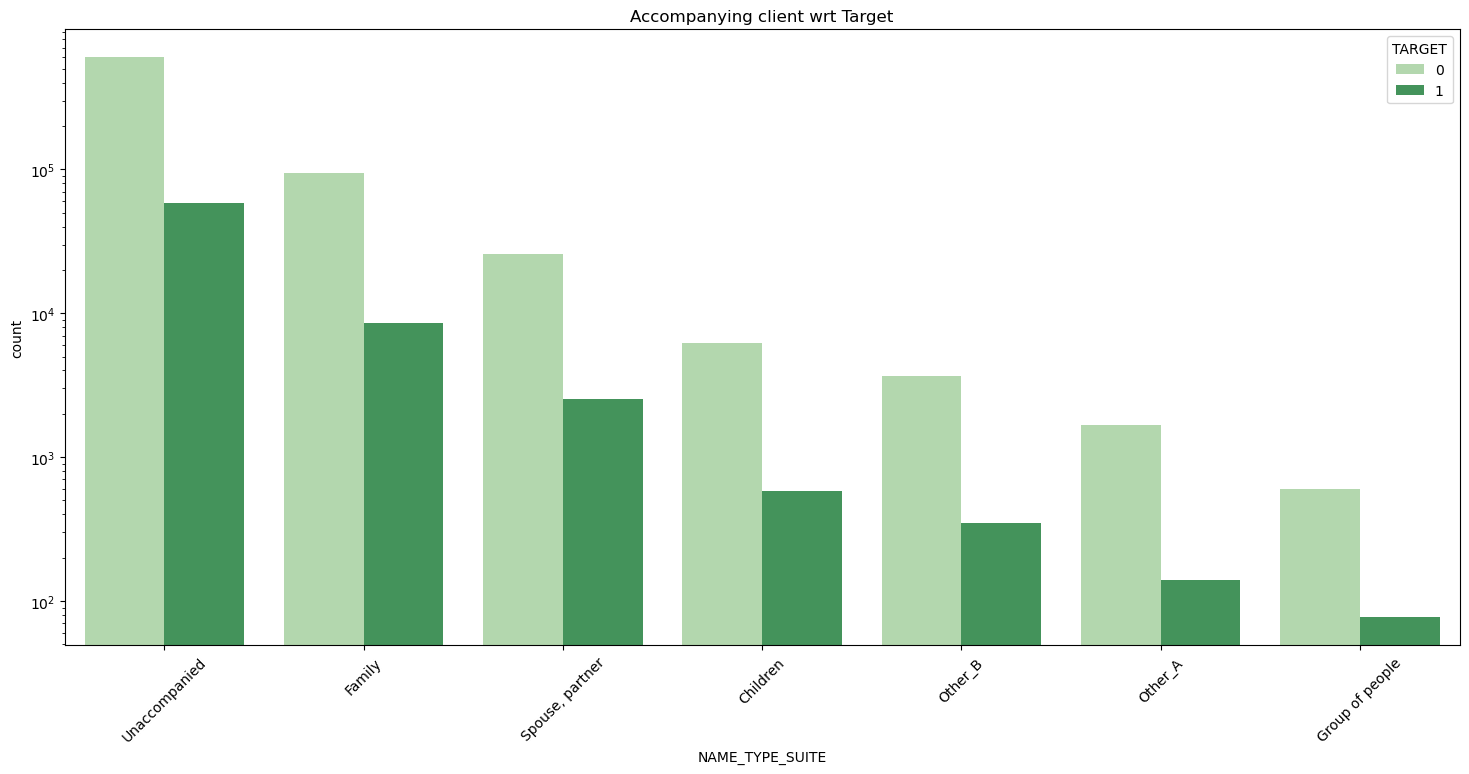

In [176]:
# PLotting for NAME_TYPE_SUITE
countplot(col1='NAME_TYPE_SUITE',title='Accompanying client wrt Target',col2='TARGET')

###### Inferences:
- Applicants tends to be the least defaulter if group of people are accompanying the applicant.
- Applicants tends to be the most defaulter if the applicant is unaccompained.

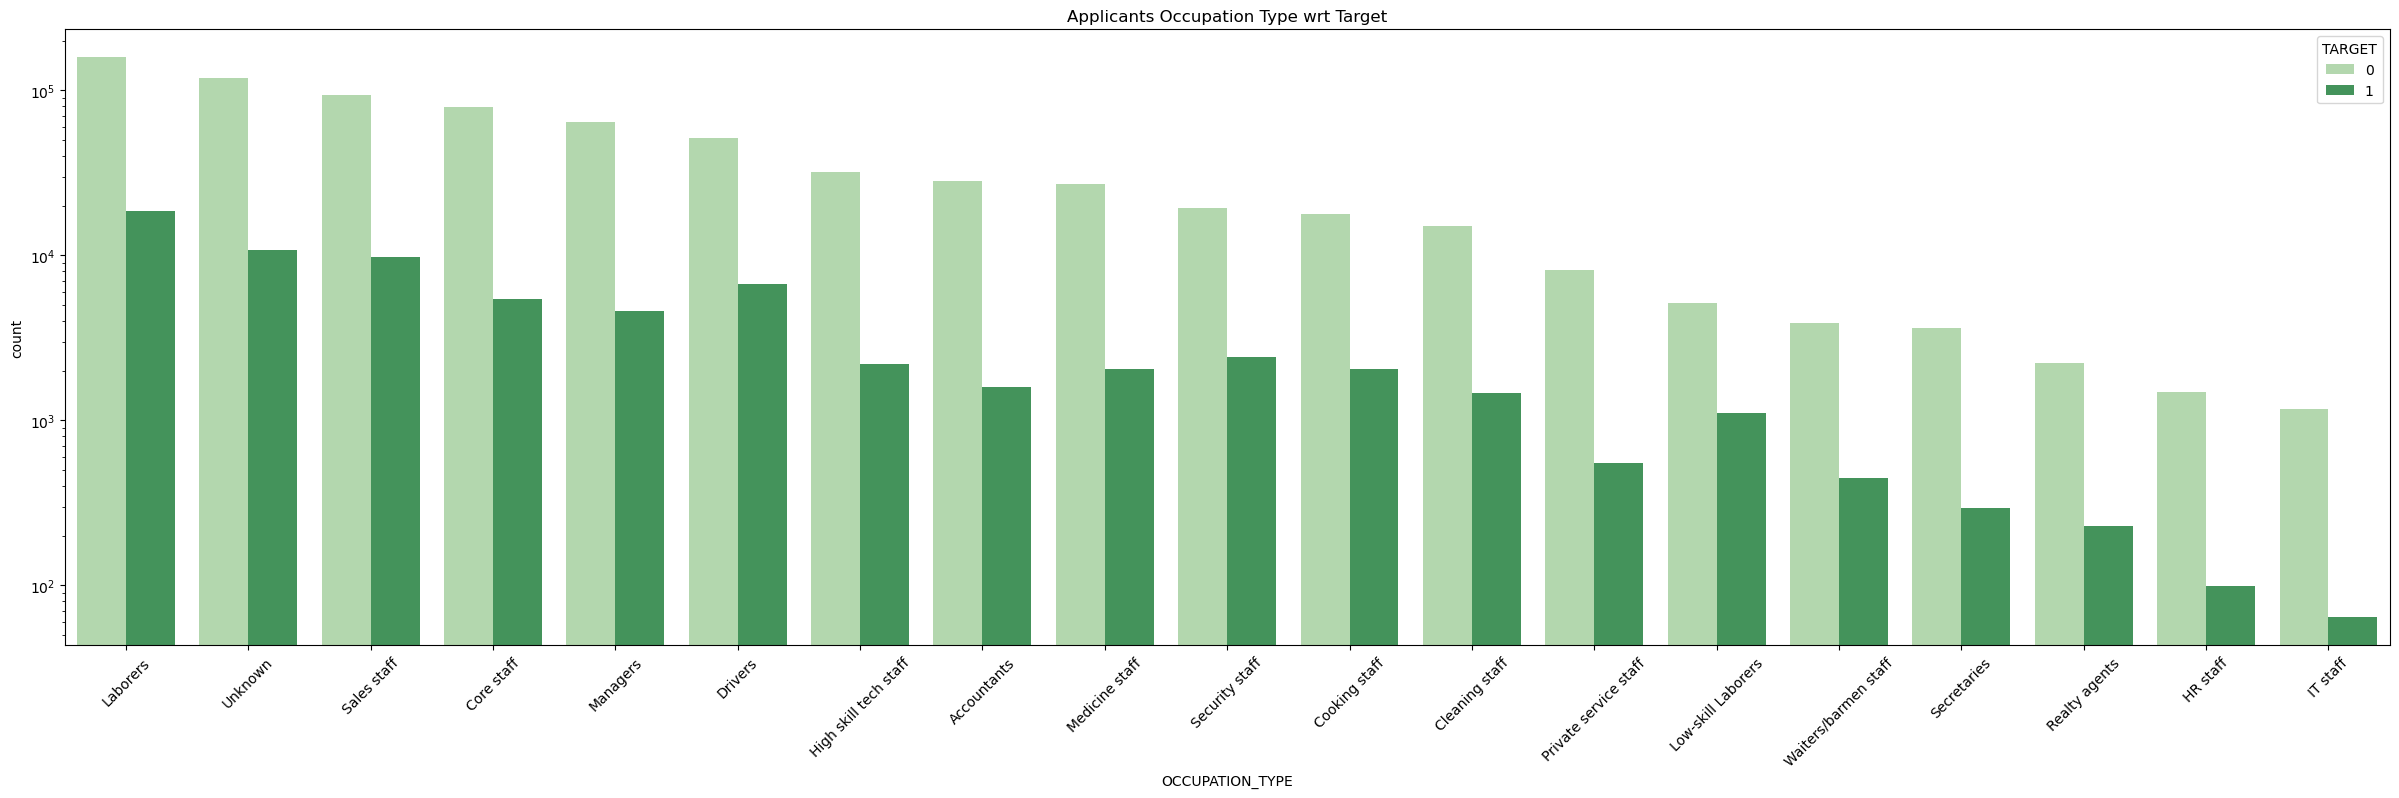

In [177]:
# PLotting for OCCUPATION_TYPE
countplot(col1='OCCUPATION_TYPE',title='Applicants Occupation Type wrt Target',col2='TARGET')

###### Inferences:
- IT staffs are tend to be the least defaulter.
- Labourers are tend to be the most defaulter followed by sales staff, drivers, security staff, cleaning staff and low-skilled labourers.

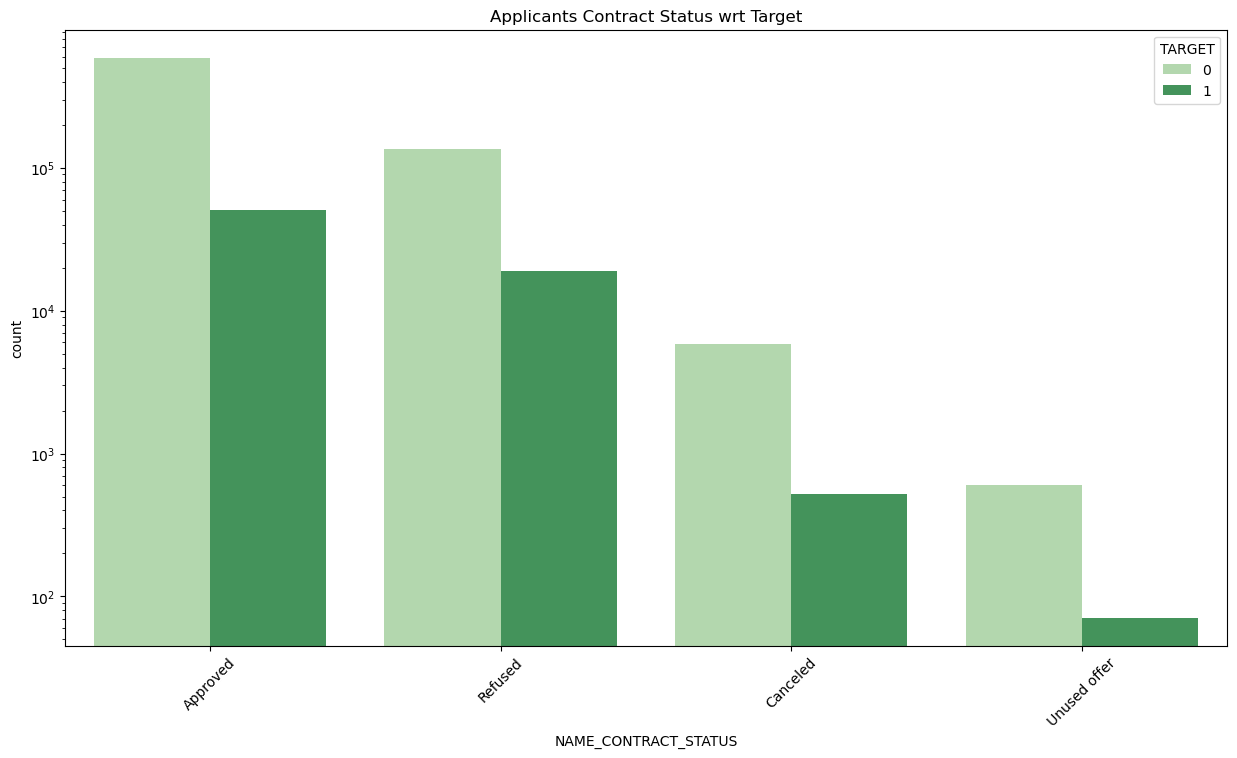

In [178]:
# PLotting for NAME_CONTRACT_STATUS
countplot(col1='NAME_CONTRACT_STATUS',title='Applicants Contract Status wrt Target',col2='TARGET')

###### Inferences:
- Applicants when contract status is approved tends to be more defaulter than others.

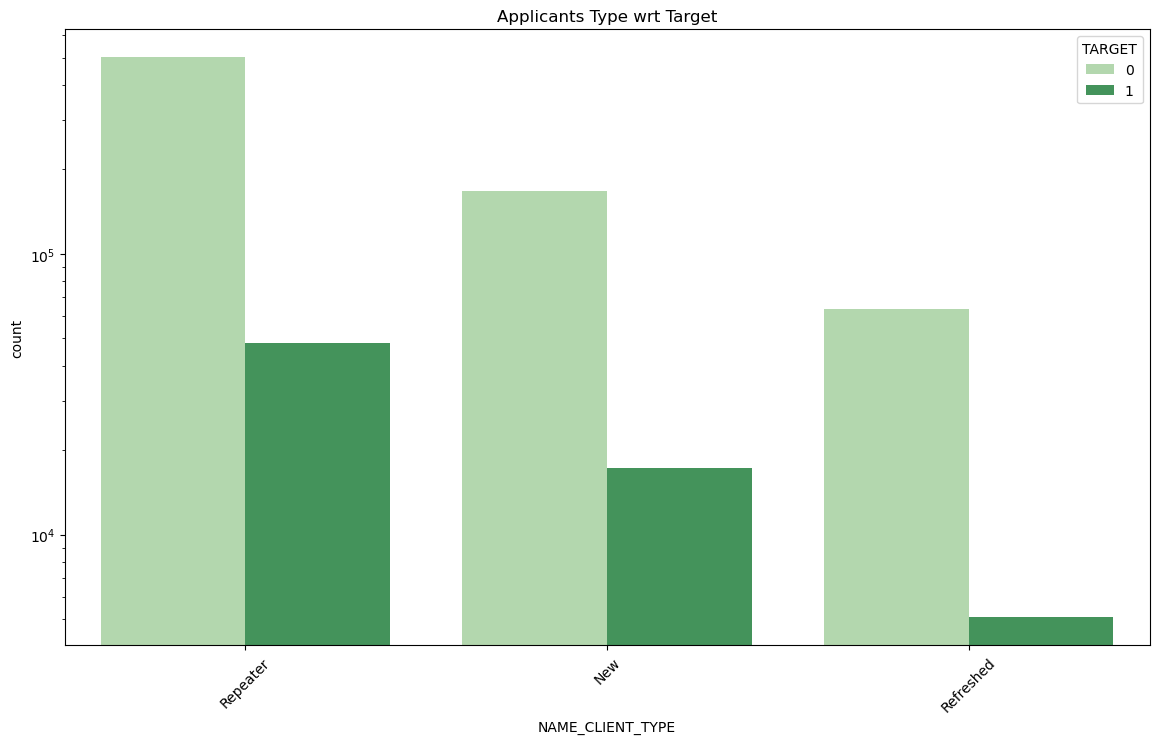

In [179]:
# PLotting for NAME_CLIENT_TYPE
countplot(col1='NAME_CLIENT_TYPE',title='Applicants Type wrt Target',col2='TARGET')

###### Inferences:
- Applicants of type ‘Refreshed’ are tends to be the least defaulter.
- Applicants of type ‘Repeater’ are tends to be the most defaulter.


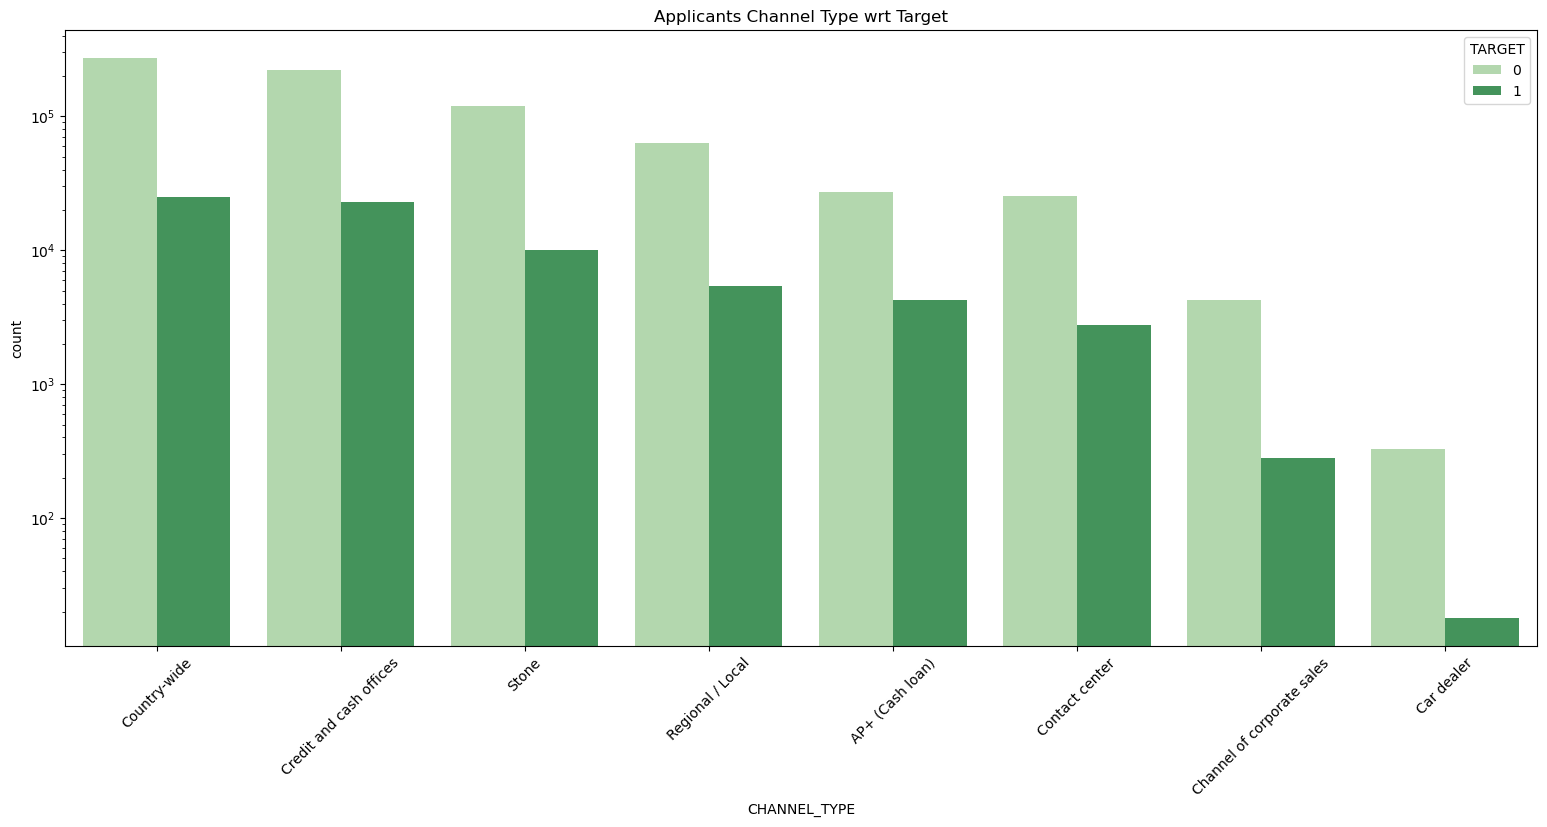

In [180]:
# PLotting for CHANNEL_TYPE
countplot(col1='CHANNEL_TYPE',title='Applicants Channel Type wrt Target',col2='TARGET')

### Analysis on Continous Variable

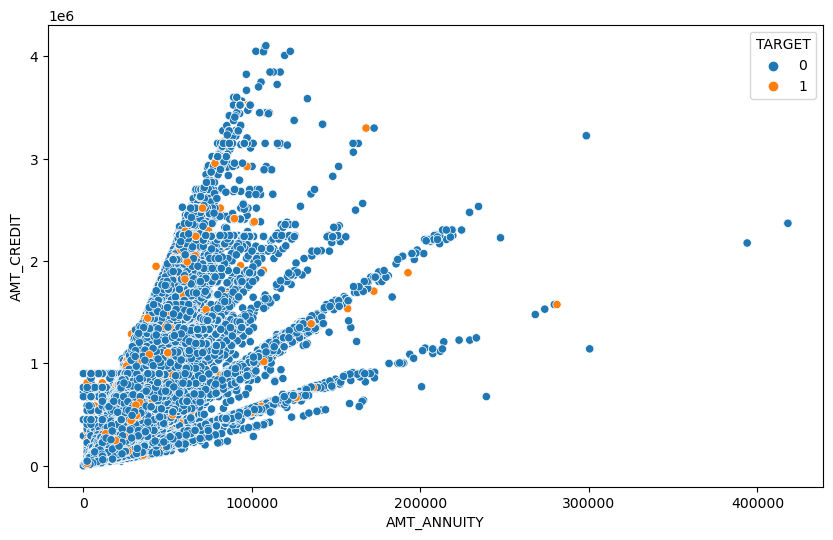

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',hue='TARGET', data=merged_df)
plt.show()

###### Inferences:
- When credit amount is increase, annuity amount also increases.
- when the amount credited lies between 2000000-3500000 and annuity amount lies between 100000-300000, applicants tends to be more defaulter.

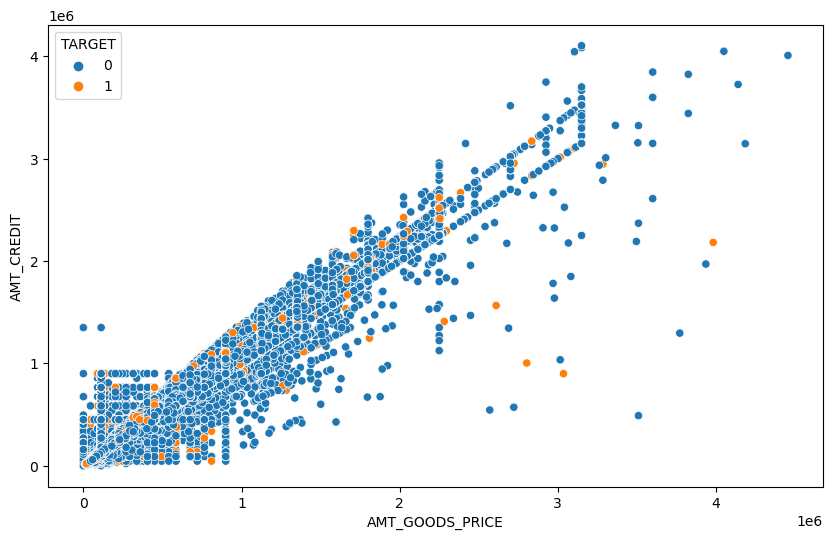

In [182]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',hue='TARGET', data=merged_df)
plt.show()

###### Inferences:
- It is observed that when amount of goods price is increased, amount credit is less.
- Applicants with higher goods price and higher credited amount are tends to be more defaulter.


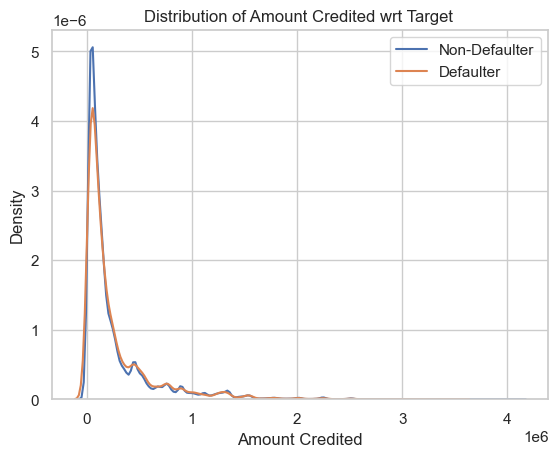

In [183]:
# Create the distribution plot
sns.set(style="whitegrid")
sns.distplot(merged_df[merged_df['TARGET'] == 0]['AMT_CREDIT'], hist=False, label='Non-Defaulter')
sns.distplot(merged_df[merged_df['TARGET'] == 1]['AMT_CREDIT'], hist=False, label='Defaulter')

plt.xlabel('Amount Credited')
plt.title('Distribution of Amount Credited wrt Target ')
plt.legend()

plt.show()

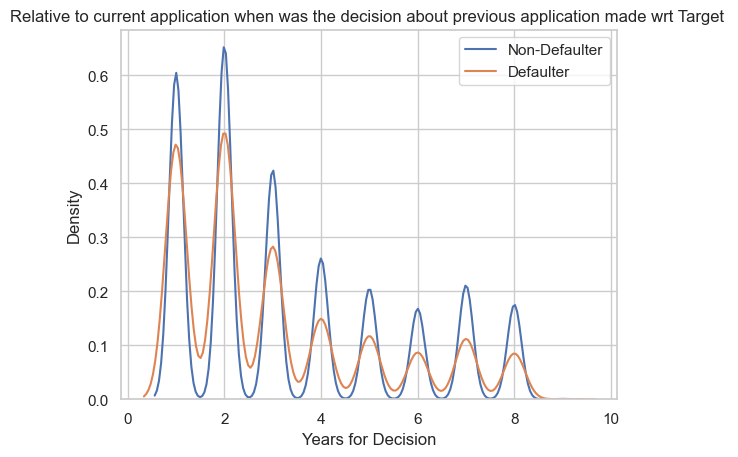

In [184]:
# Create the distribution plot
sns.set(style="whitegrid")
sns.distplot(merged_df[merged_df['TARGET'] == 0]['YEARS_DECISION'], hist=False, label='Non-Defaulter')
sns.distplot(merged_df[merged_df['TARGET'] == 1]['YEARS_DECISION'], hist=False, label='Defaulter')

plt.xlabel('Years for Decision')
plt.title('Relative to current application when was the decision about previous application made wrt Target ')
plt.legend()

plt.show()

###### Inferences:
- Relative to current application when the decision about previous application made early are tends to be more defaulter.
- Relative to current application when the decision about previous application made late are tends to be least defaulter.


### Analysing using Heatmap

In [185]:
merged_df.CNT_PAYMENT.unique()

array([24., 12.,  6., 48.,  0., 18., 10., 30.,  8., 16., 36.,  5.,  4.,
       60., 42., 54., 14., 20.,  3., 15.,  9., 11., 72.,  7., 22., 17.,
       13., 29., 53., 84., 23., 26., 28., 32., 34., 19., 66., 35., 33.,
       39., 21., 41., 45., 59.])

In [186]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'AGE_CATEGORICAL', 'AMT_INCOME_RANGE', 'NAME_INCOME_TYPE',
       'YEARS_EMPLOYED_CATEGORICAL', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'YEARS_EMPLOYED',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'PRODUCT_COMBINATION',
       'YEARS_DECISION'],
      dtype='object')

In [187]:
corr_cols1 = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
             'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 
             'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
              'CNT_PAYMENT']

In [188]:
# Creating dataframe for numerical columns
merged_df_corr = merged_df[corr_cols1]

In [189]:
# Corelation matrix
merged_df_corr.corr()

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_CREDIT                     1.000000     0.817685         0.980139   
AMT_ANNUITY                    0.817685     1.000000         0.811931   
AMT_GOODS_PRICE                0.980139     0.811931         1.000000   
CNT_CHILDREN                  -0.051077    -0.045636        -0.049042   
CNT_FAM_MEMBERS               -0.022100    -0.020239        -0.021029   
DEF_60_CNT_SOCIAL_CIRCLE      -0.005755    -0.011868        -0.006777   
DEF_30_CNT_SOCIAL_CIRCLE      -0.003522    -0.010730        -0.004711   
REG_REGION_NOT_LIVE_REGION     0.004584     0.013926         0.005099   
REG_REGION_NOT_WORK_REGION     0.016881     0.035319         0.017634   
LIVE_REGION_NOT_WORK_REGION    0.017546     0.034371         0.018166   
LIVE_CITY_NOT_WORK_CITY       -0.010095    -0.015565        -0.010240   
REG_CITY_NOT_LIVE_CITY        -0.023024    -0.021443        -0.022861   
REG_CITY_NOT_WORK_CITY        -0.022669    -0.027637        -0.022543   
CNT_PAYMENT                    0.673977     0.403674         0.673027   

                             CNT_CHILDREN  CNT_FAM_MEMBERS  \
AMT_CREDIT                      -0.051077        -0.022100   
AMT_ANNUITY                     -0.045636        -0.020239   
AMT_GOODS_PRICE                 -0.049042        -0.021029   
CNT_CHILDREN                     1.000000         0.898487   
CNT_FAM_MEMBERS                  0.898487         1.000000   
DEF_60_CNT_SOCIAL_CIRCLE         0.003983         0.001031   
DEF_30_CNT_SOCIAL_CIRCLE         0.005638         0.004611   
REG_REGION_NOT_LIVE_REGION      -0.015221        -0.018407   
REG_REGION_NOT_WORK_REGION      -0.011266        -0.014951   
LIVE_REGION_NOT_WORK_REGION     -0.005225        -0.007204   
LIVE_CITY_NOT_WORK_CITY          0.021117         0.031433   
REG_CITY_NOT_LIVE_CITY           0.008276         0.003336   
REG_CITY_NOT_WORK_CITY           0.018425         0.022651   
CNT_PAYMENT                     -0.042073        -0.023218   

                             DEF_60_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.005755   
AMT_ANNUITY                                 -0.011868   
AMT_GOODS_PRICE                             -0.006777   
CNT_CHILDREN                                 0.003983   
CNT_FAM_MEMBERS                              0.001031   
DEF_60_CNT_SOCIAL_CIRCLE                     1.000000   
DEF_30_CNT_SOCIAL_CIRCLE                     0.861250   
REG_REGION_NOT_LIVE_REGION                  -0.008490   
REG_REGION_NOT_WORK_REGION                  -0.019324   
LIVE_REGION_NOT_WORK_REGION                 -0.018024   
LIVE_CITY_NOT_WORK_CITY                     -0.002572   
REG_CITY_NOT_LIVE_CITY                       0.007946   
REG_CITY_NOT_WORK_CITY                       0.003521   
CNT_PAYMENT                                  0.004198   

                             DEF_30_CNT_SOCIAL_CIRCLE  \
AMT_CREDIT                                  -0.003522   
AMT_ANNUITY                                 -0.010730   
AMT_GOODS_PRICE                             -0.004711   
CNT_CHILDREN                                 0.005638   
CNT_FAM_MEMBERS                              0.004611   
DEF_60_CNT_SOCIAL_CIRCLE                     0.861250   
DEF_30_CNT_SOCIAL_CIRCLE                     1.000000   
REG_REGION_NOT_LIVE_REGION                  -0.009990   
REG_REGION_NOT_WORK_REGION                  -0.018693   
LIVE_REGION_NOT_WORK_REGION                 -0.016734   
LIVE_CITY_NOT_WORK_CITY                     -0.002232   
REG_CITY_NOT_LIVE_CITY                       0.007536   
REG_CITY_NOT_WORK_CITY                       0.003299   
CNT_PAYMENT                                  0.007824   

                             REG_REGION_NOT_LIVE_REGION  \
AMT_CREDIT                                     0.004584   
AMT_ANNUITY                                    0.013926   
AMT_GOODS_PRICE                                0.005099   
CNT_CHILDREN                                  -0.01522

In [200]:
correlations = merged_df_corr.corr()
top_10_correlations = correlations.unstack().sort_values(ascending=False)
top_10_correlations = top_10_correlations[top_10_correlations.index.get_level_values(0) != top_10_correlations.index.get_level_values(1)]
top_10_correlations = top_10_correlations.head(20)

top_10_correlations

AMT_CREDIT                   AMT_GOODS_PRICE                0.980139
AMT_GOODS_PRICE              AMT_CREDIT                     0.980139
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.898487
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.898487
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.878678
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.878678
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861250
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861250
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.828603
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.828603
AMT_ANNUITY                  AMT_CREDIT                     0.817685
AMT_CREDIT                   AMT_ANNUITY                    0.817685
AMT_GOODS_PRICE              AMT_ANNUITY                    0.811931
AMT_ANNUITY                  AMT_GOODS_PRICE                0.811931
AMT_CREDIT                   CNT_P

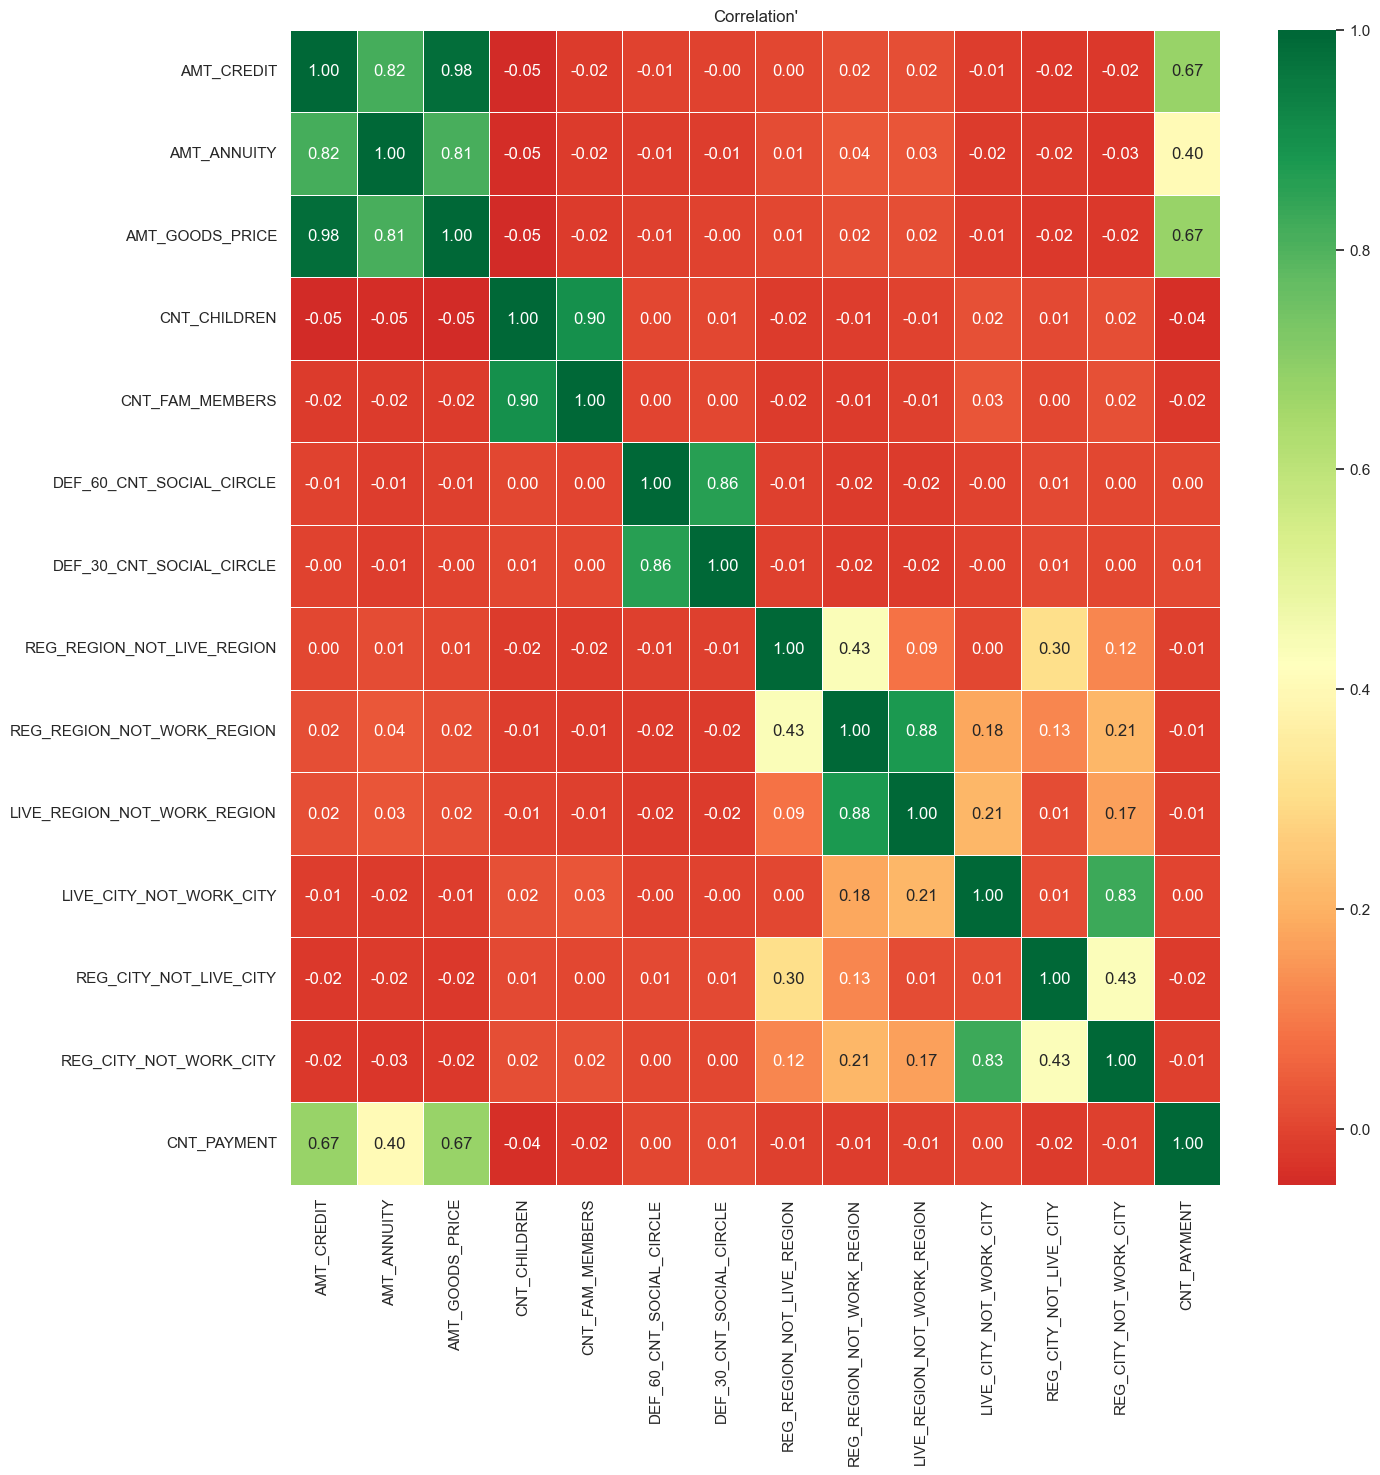

In [201]:
plt.figure(figsize=(15,15))
sns.heatmap(merged_df_corr.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, center = 0.421)
plt.title("Correlation'")
plt.show()

###### Top 10 Correlations:
- AMT_ CREDIT and AMT_GOODS_PRICE has a positive correlation of 0.980139
- CNT_CHILDREN and CNT_FAM_MEMBERS has a positive correlation of 0.898487
- LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of 0.878678
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE has a positive correlation of 0.861250
- REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY has a positive correlation of 0.828603
- AMT_CREDIT and AMT_ANNUITY has a positive correlation of 0.817685
- AMT_GOODS_PRICE and AMT_ ANNUITY has a positive correlation of 0.811931
- AMT_CREDIT and CNT_PAYMENT has a positive correlation of 0.673977
- AMT_GOODS_PRICE and CNT_PAYMENT has a positive correlation of 0.673027
- REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION has a positive correlation of has a positive correlation of 0.433681